# Final Project
<br> DS634 - Data Mining
<br> Christopher Chan
<br> Professor Abduallah
<br> April 21st 2024


https://github.com/njitchrisc0923/DS634-Chan-Christopher-Final-Project

## Part 1: Objective

The primary objective of this project is to develop and evaluate multiple machine learning classification algorithms, along with a deep learning model, to predict the probability of fraudulent transactions. Specifically, the project will implement Random Forest and Naive Bayes classifiers, as well as a 1D Convolutional Neural Network (CNN). The project will involve rigorous data preprocessing, feature engineering, model training, and evaluation using standard performance metrics like accuracy, precision, recall, and F1-score. Cross-validation techniques will be applied to ensure robustness in model evaluation. By comparing and analyzing the performance of these different approaches, the project aims to identify the most suitable model for fraud detection, providing insights into transactional patterns indicative of fraudulent behavior and offering recommendations for real-world deployment in fraud prevention systems.

## Part 2: Exploratory Data Analysis

In [4]:
# Use this function if scikeras is not installed, we need it for optimizing the conv1D model
# !pip install scikeras

In [5]:
# Libraries to import
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier
import warnings
warnings.filterwarnings("ignore")

### Part 2.1: Data Properties

In [6]:
# Attempt to read the csv, depends on whether we are working from colab or local folder
try:
  credit_card = pd.read_csv('creditcard.csv')
except:
  print("Error")

try:
  credit_card = pd.read_csv('/content/sample_data/creditcard.csv')
except:
  print("Error")

Error


In [7]:
credit_card.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
# Name of the columns
credit_card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# Data type of each column
credit_card.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
# Look at the info of each column
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
# Generate descriptive statistics for the credit_card
credit_card.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Relatively clean data

In [12]:
# Drop the rows with NA and show the shape
credit_card_dropped = credit_card.dropna()
print(credit_card_dropped.shape)
print(credit_card.shape)

(284807, 31)
(284807, 31)


### Part 2.2: Checking Imbalances

<Axes: xlabel='Class', ylabel='count'>

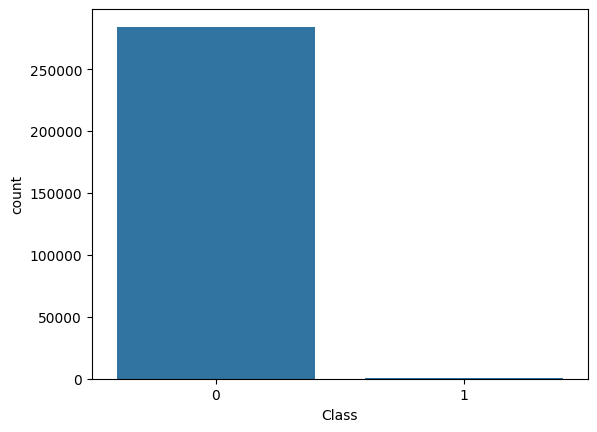

In [13]:
# Plot the count of each class
sns.countplot(data = credit_card, x = 'Class')

Dataset is relatively imbalanced, we will employ undersampling to balance the minority class

In [14]:
# Count the numbero f each class
print(credit_card['Class'].value_counts()[0])
print(credit_card['Class'].value_counts()[1])

284315
492


To keep the extraction fair, we will shuffle the dataset beforehand and select 492 observations from class=0 for our machine learning models

In [15]:
# Shuffle the data and randomly select the non-fraudulent data (class = 0 ) to balance with the number of fradulent data
shuffled_credit_card = credit_card.sample(frac=1, random_state=42).reset_index(drop=True)

fraud = shuffled_credit_card.loc[shuffled_credit_card['Class'] == 1]
nonfraud = shuffled_credit_card.loc[shuffled_credit_card['Class'] == 0][:len(fraud)]

new_credit_card = pd.concat([fraud, nonfraud])

In [16]:
# Double chekcing that the data is balanced
print(len(fraud))
print(len(nonfraud))
print(len(new_credit_card))

492
492
984


### Part 2.3: Feature Selection

#### Part 2.3.1: Correlation Matrix

<Axes: >

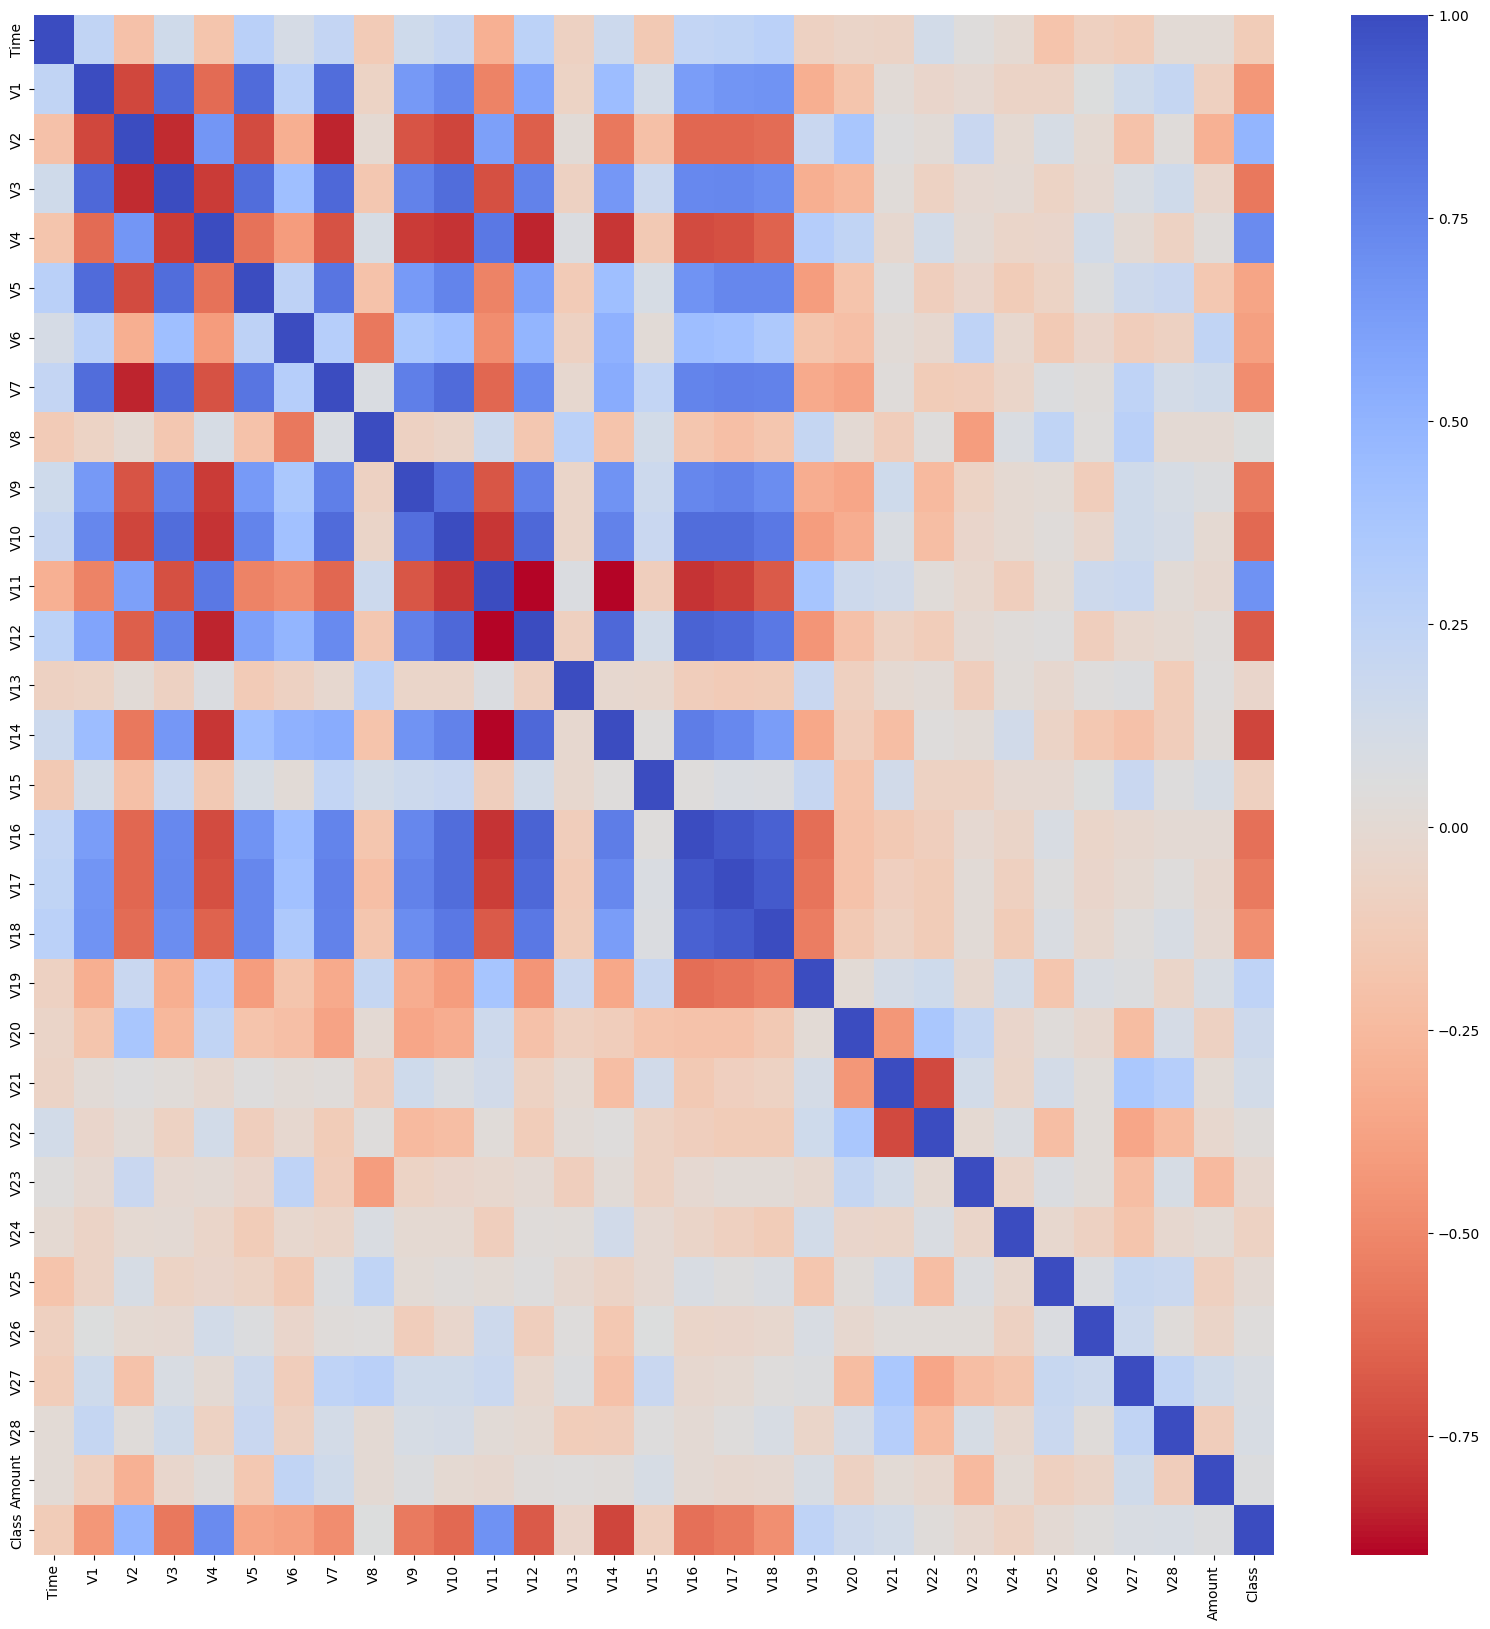

In [17]:
# Create and plot the correlation matrix for the different variables
corr = new_credit_card.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm_r')

In [18]:
# Display the correlation between the features and the label (Class)
corr['Class'].sort_values()

V14      -0.748671
V12      -0.679680
V10      -0.626376
V16      -0.598676
V3       -0.563496
V17      -0.561101
V9       -0.558755
V7       -0.475045
V18      -0.473211
V1       -0.430676
V6       -0.386495
V5       -0.370061
Time     -0.132689
V15      -0.094396
V24      -0.076578
V13      -0.043471
V23      -0.016247
V25       0.007091
V22       0.030112
V26       0.044197
V8        0.058153
Amount    0.065625
V27       0.084914
V28       0.091795
V21       0.130347
V20       0.160407
V19       0.247742
V2        0.490349
V11       0.683459
V4        0.717834
Class     1.000000
Name: Class, dtype: float64

We have several variables the demonstrate strong positive and negative correlation to the label.

Strong negative association:
    V14, V12, V10, V16, V3, V17, V9, V7, V18, V1

Strong positive Association:
    V2, V11, V4



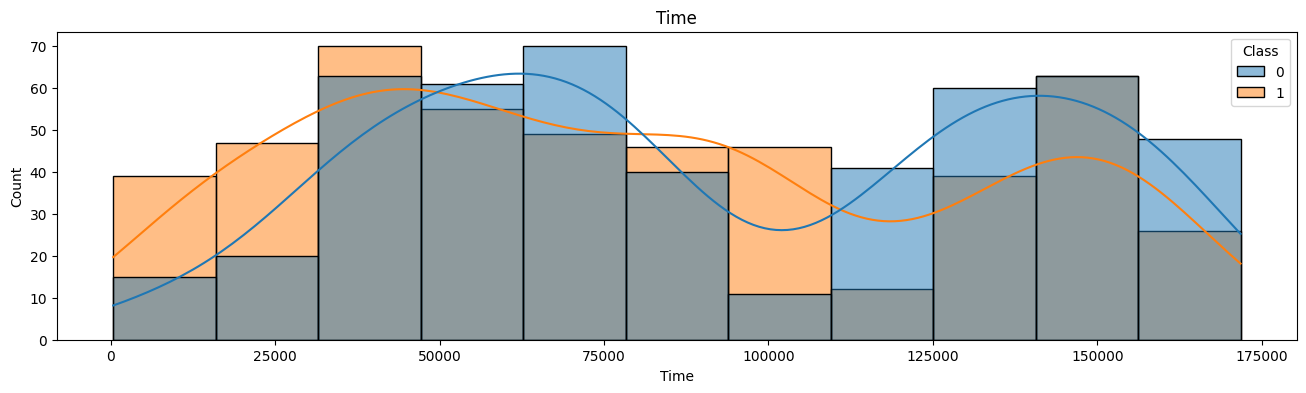

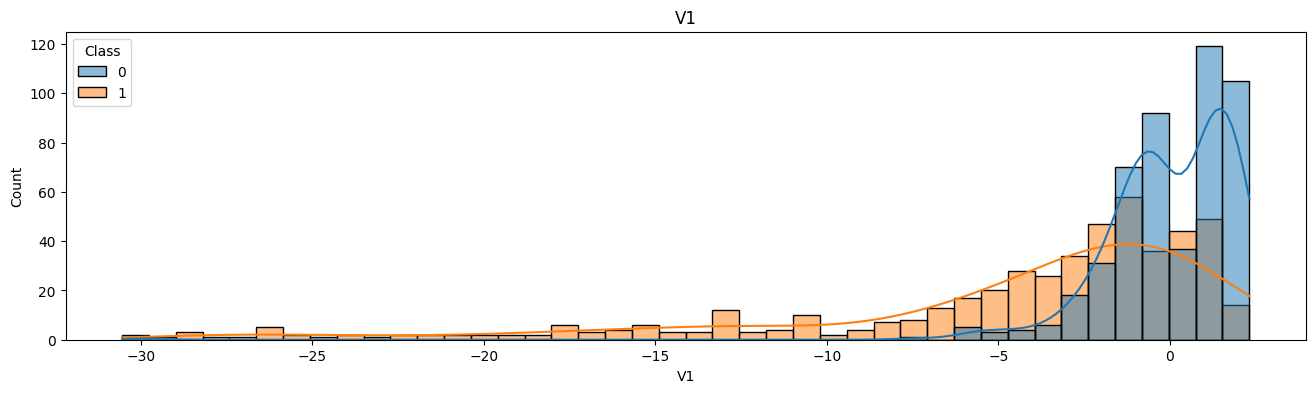

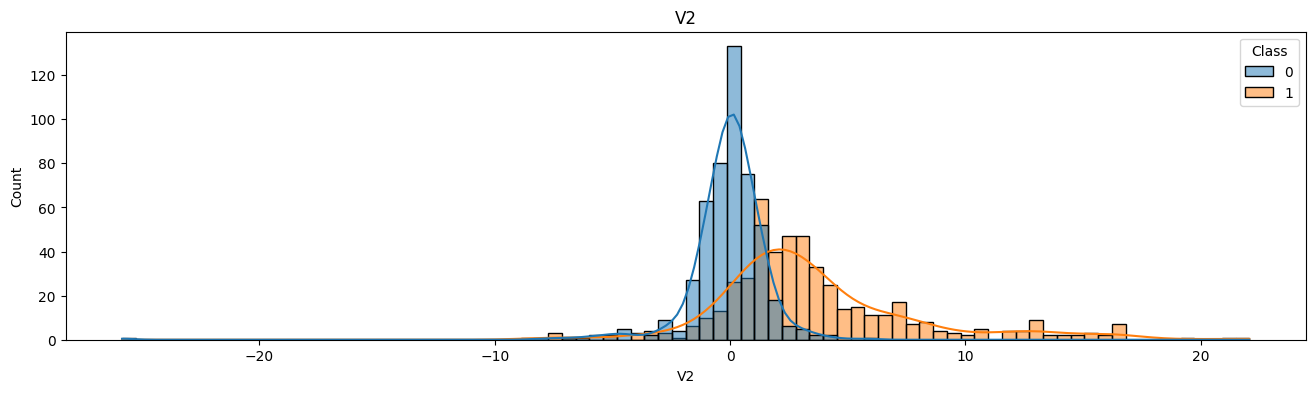

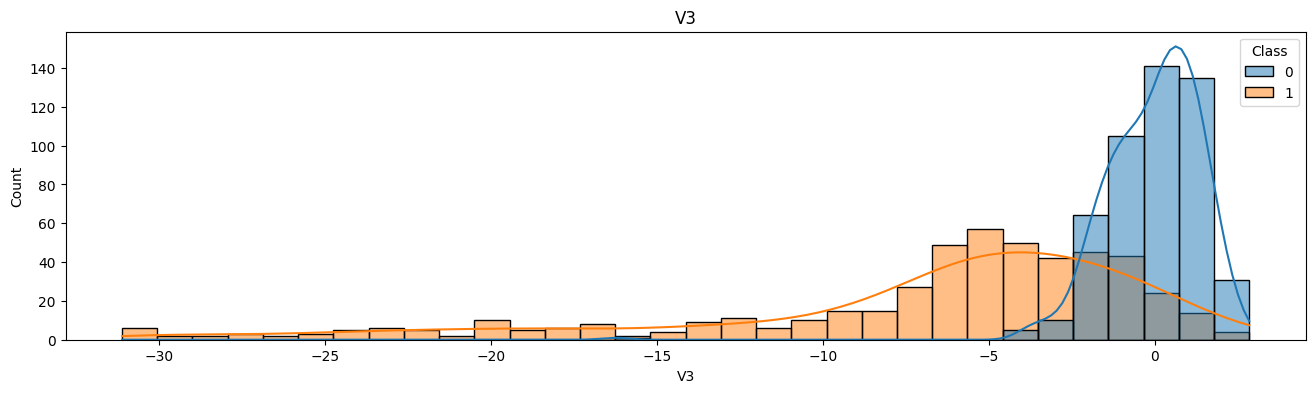

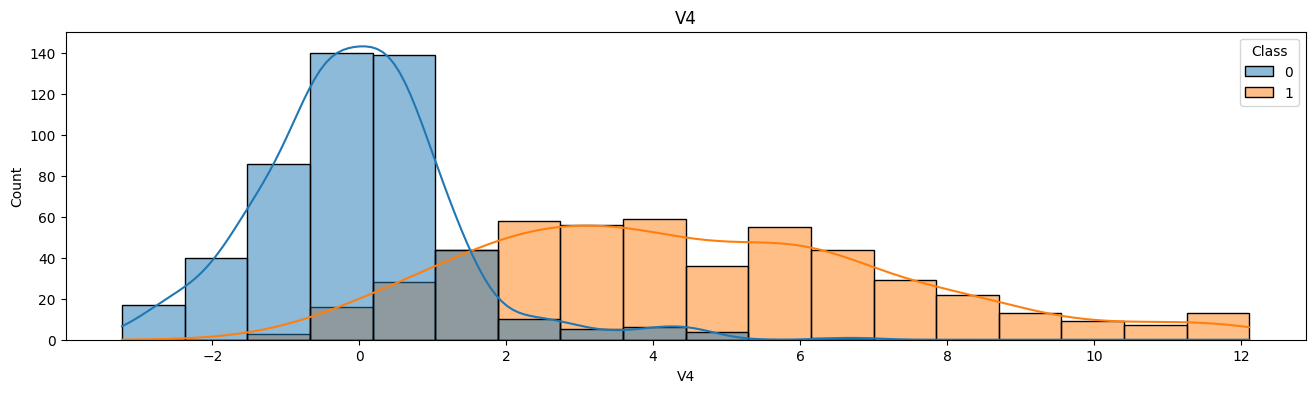

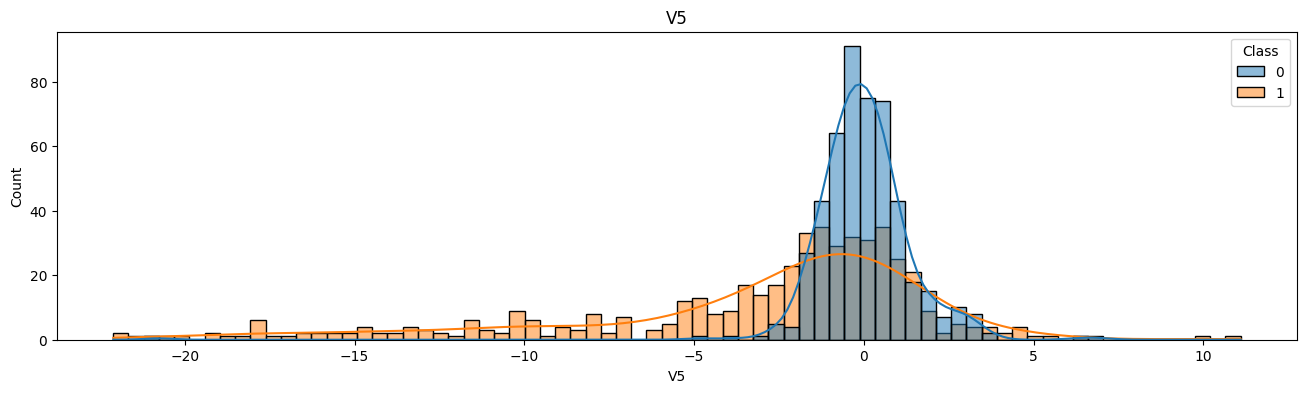

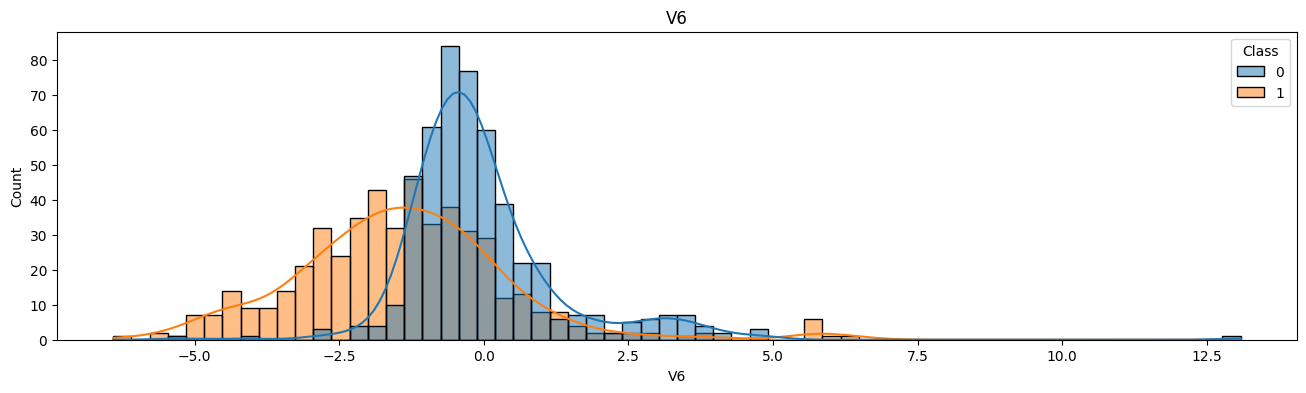

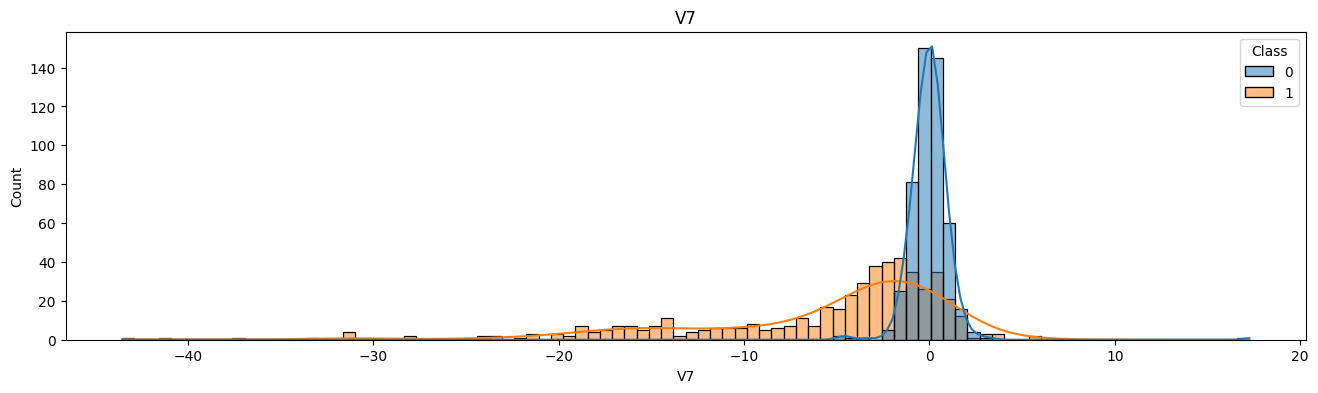

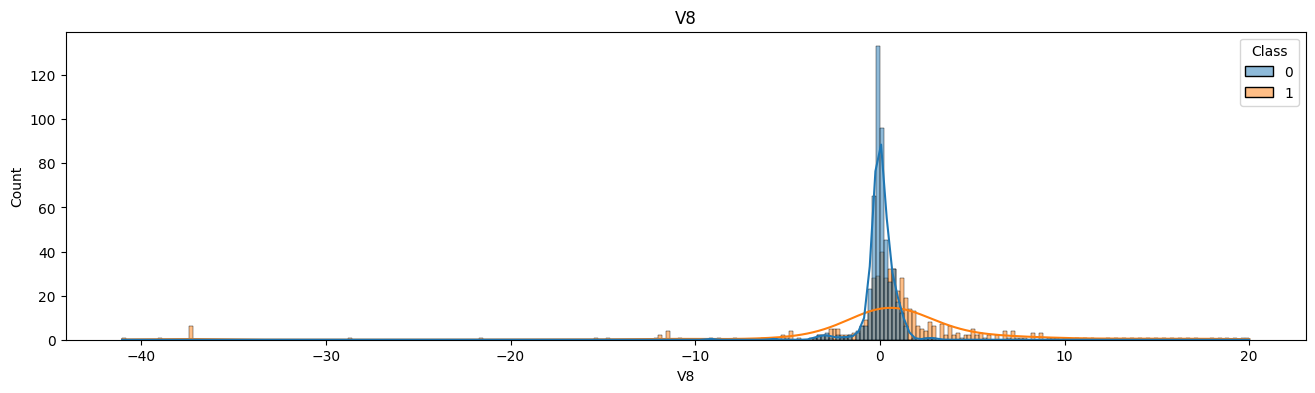

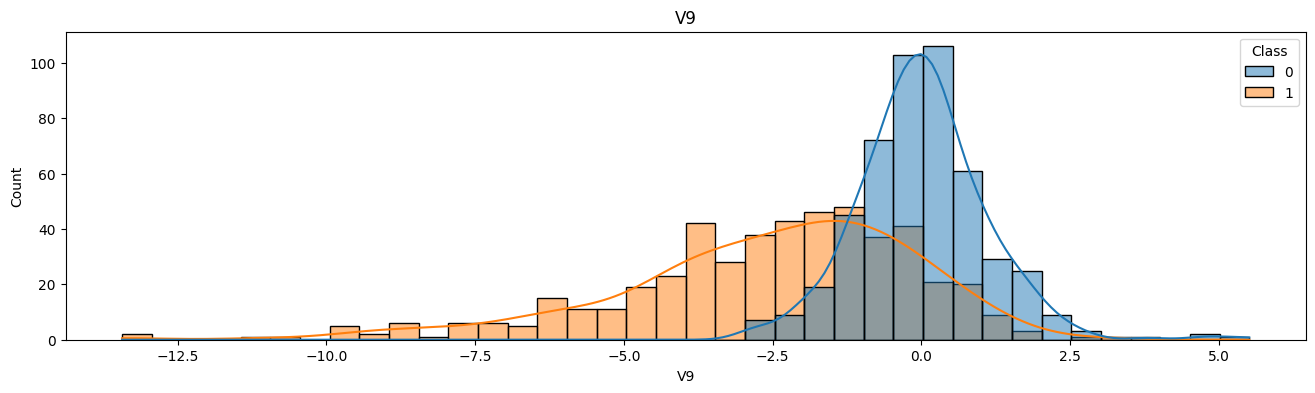

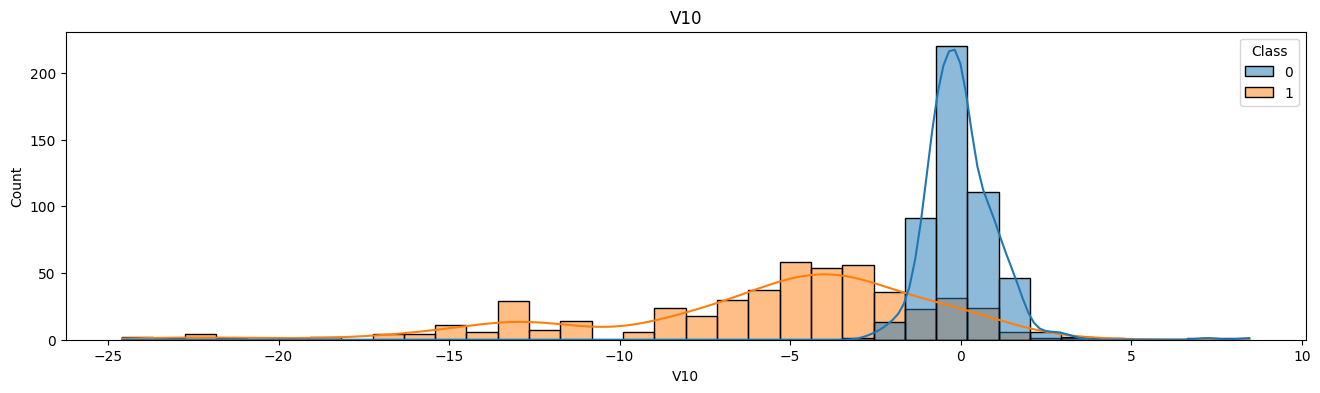

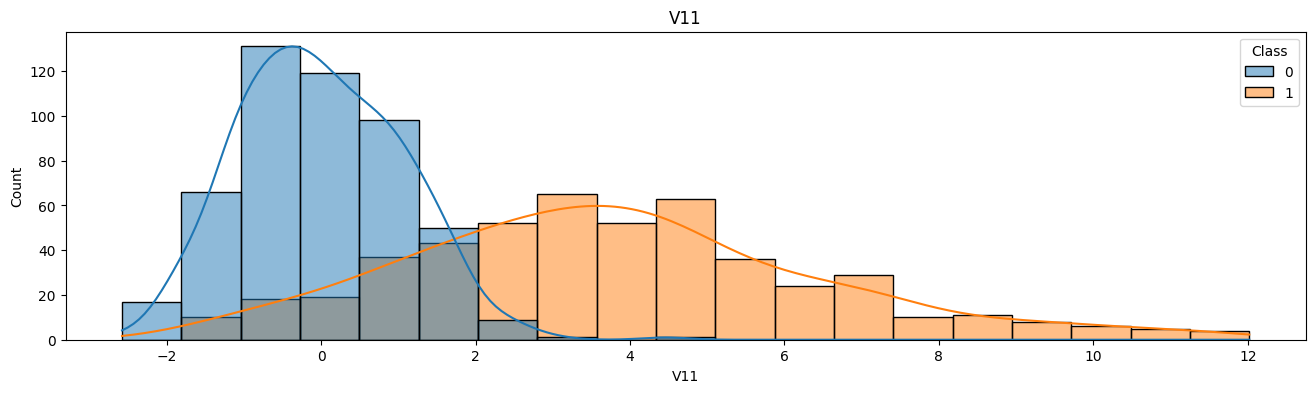

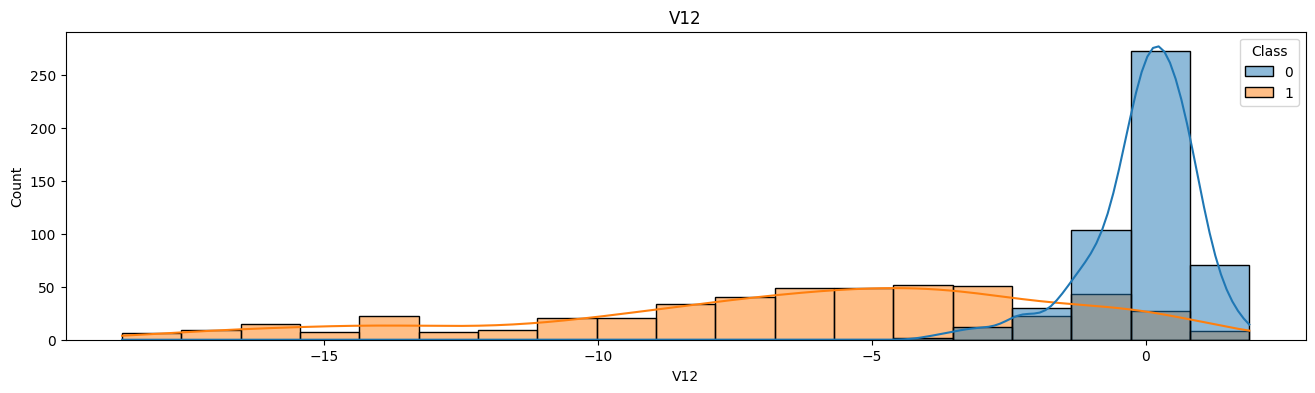

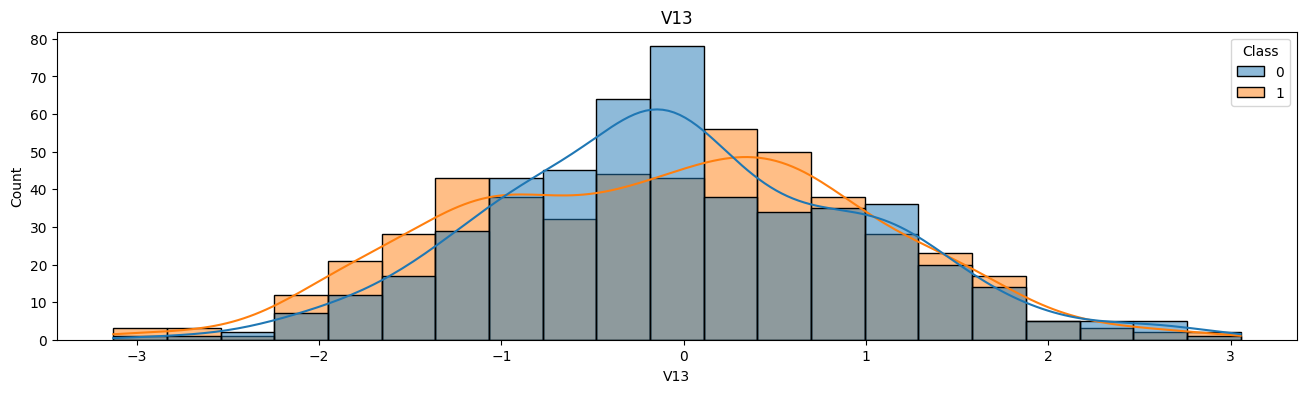

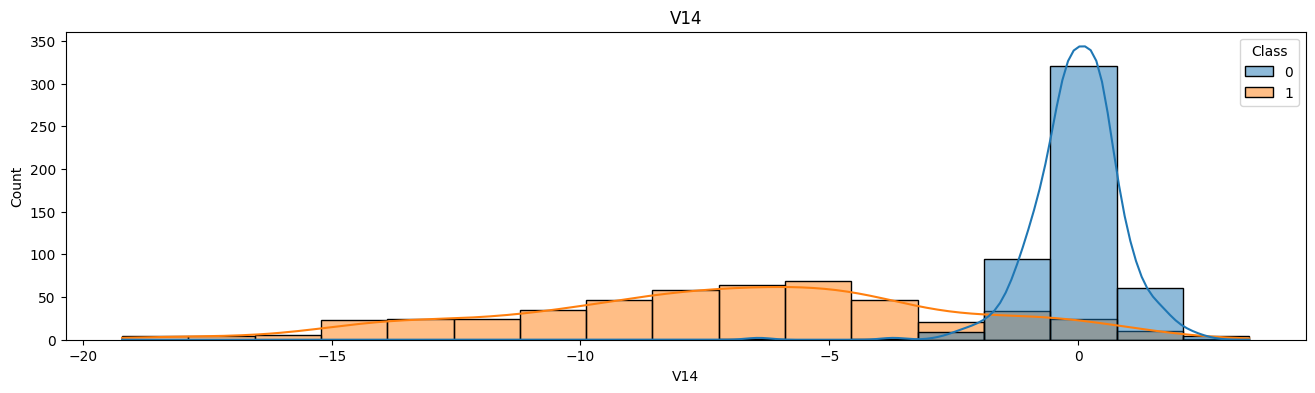

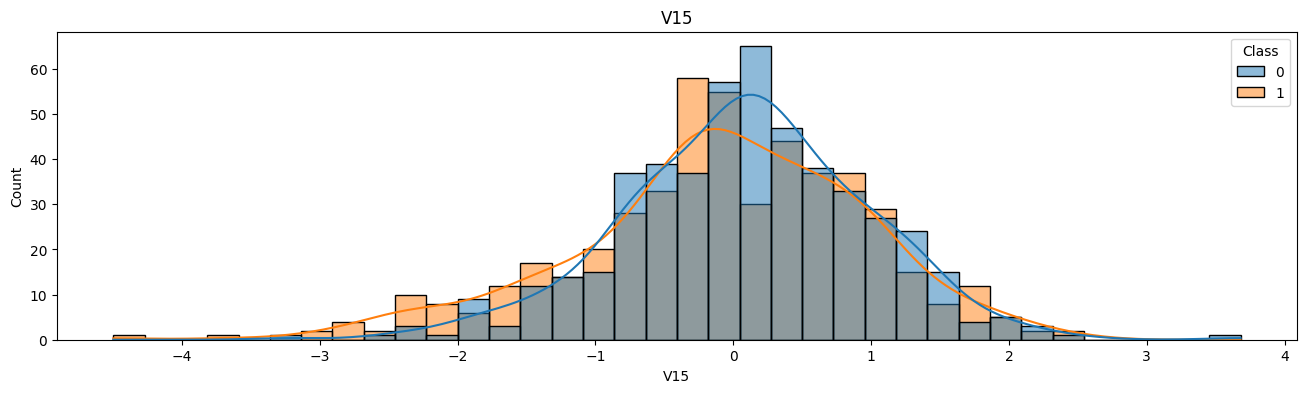

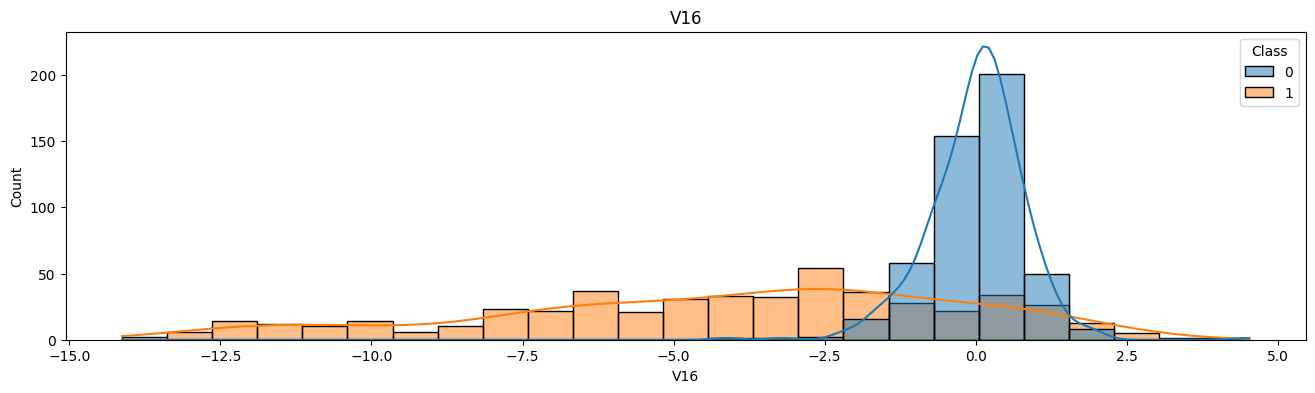

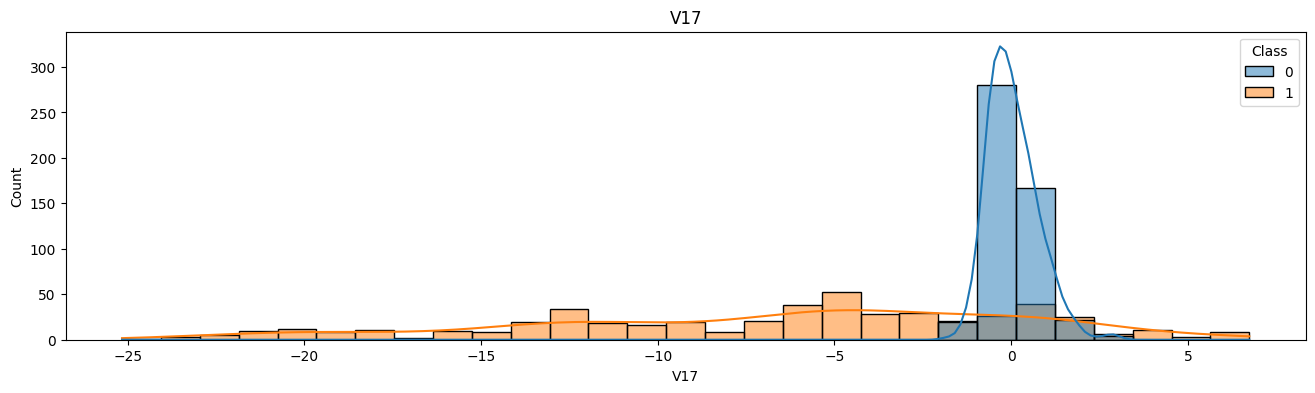

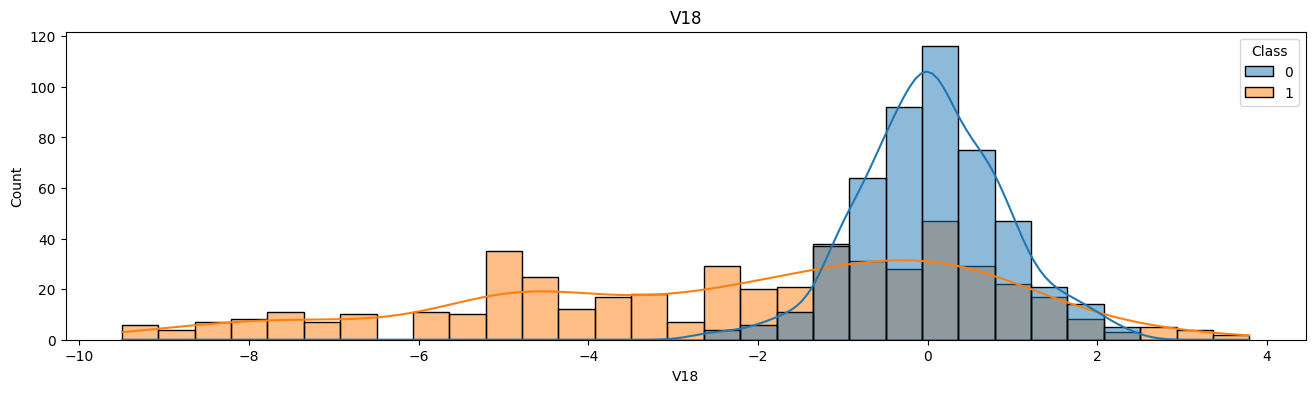

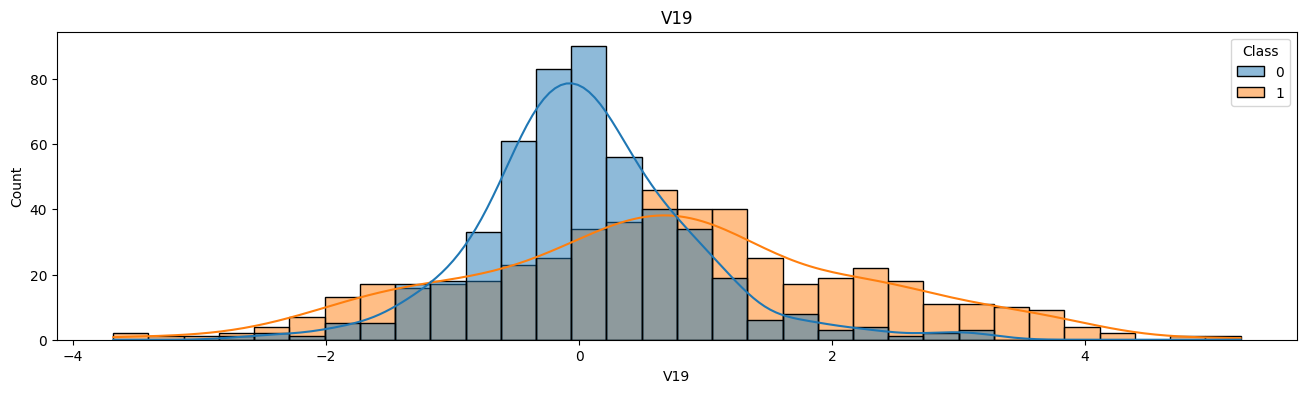

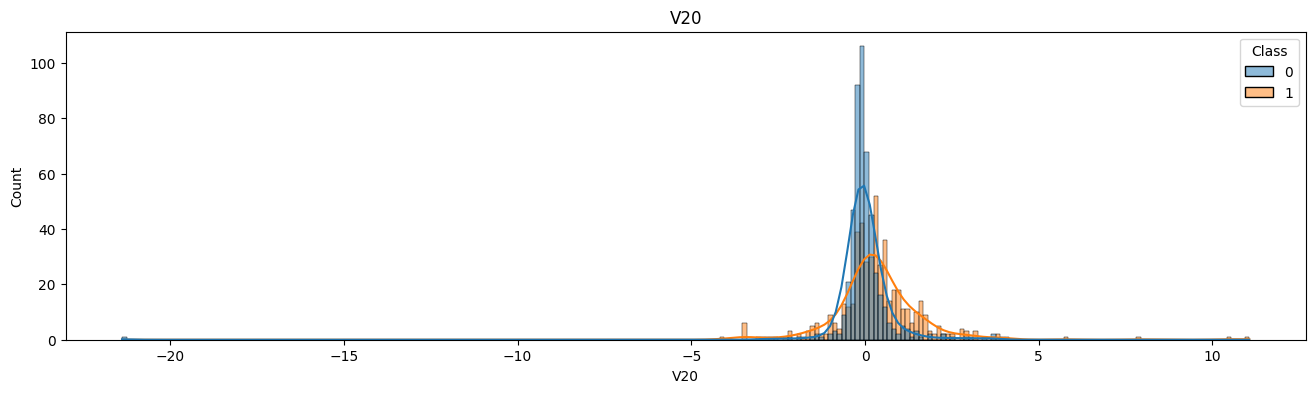

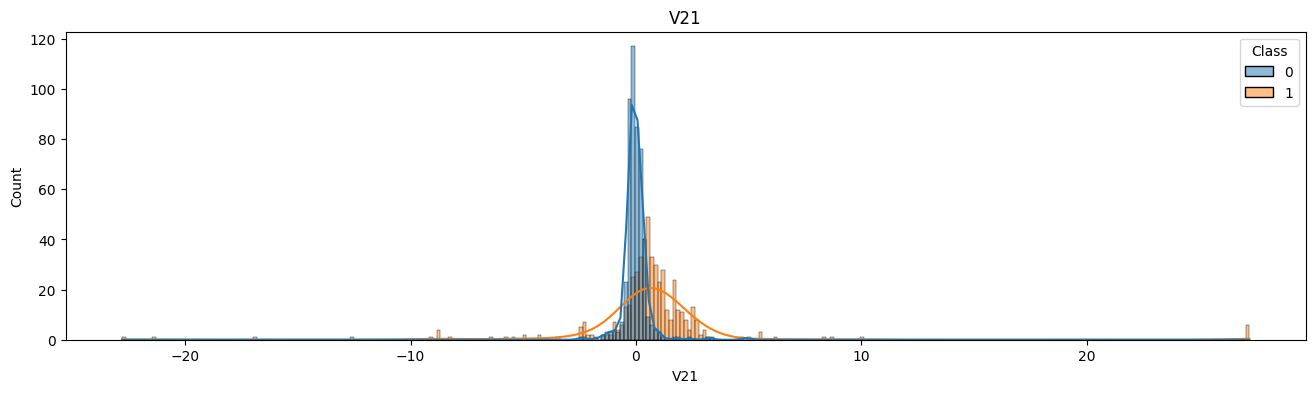

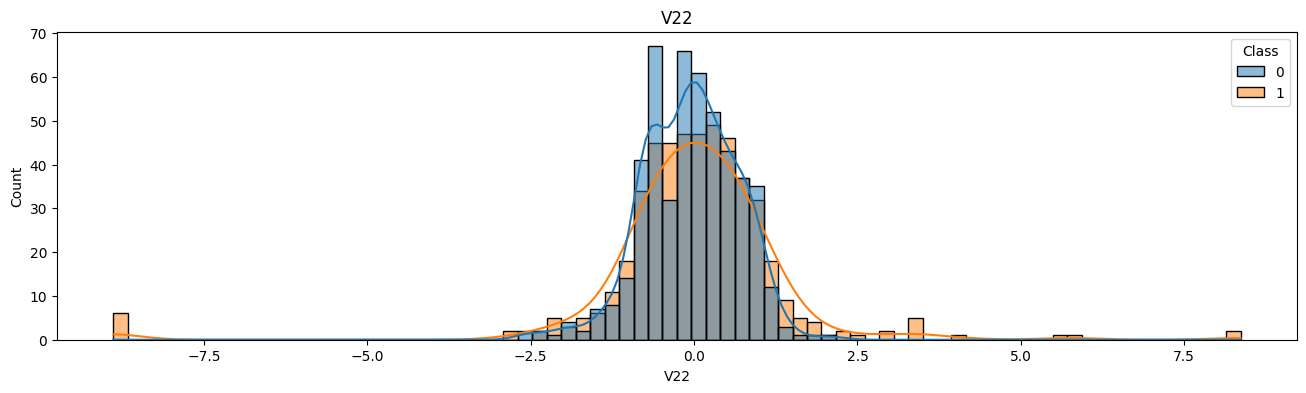

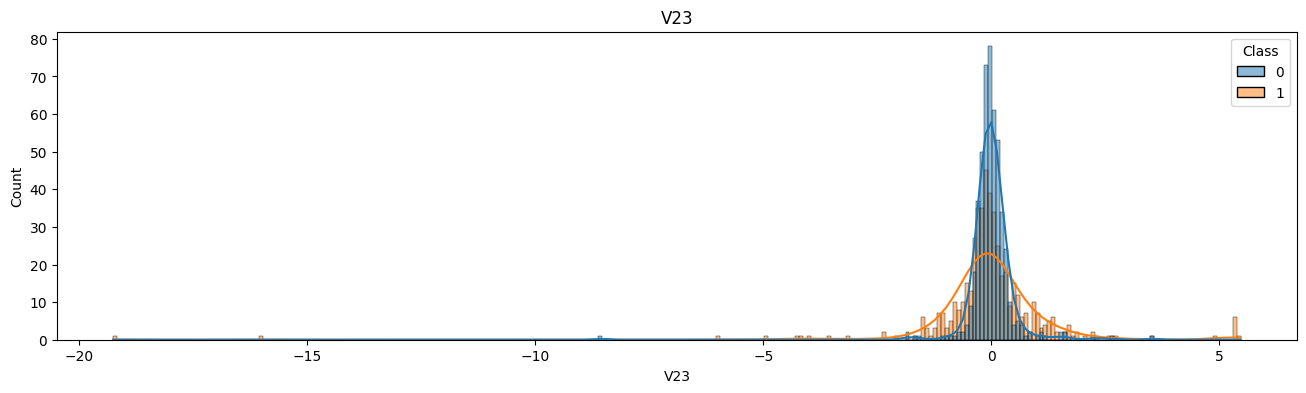

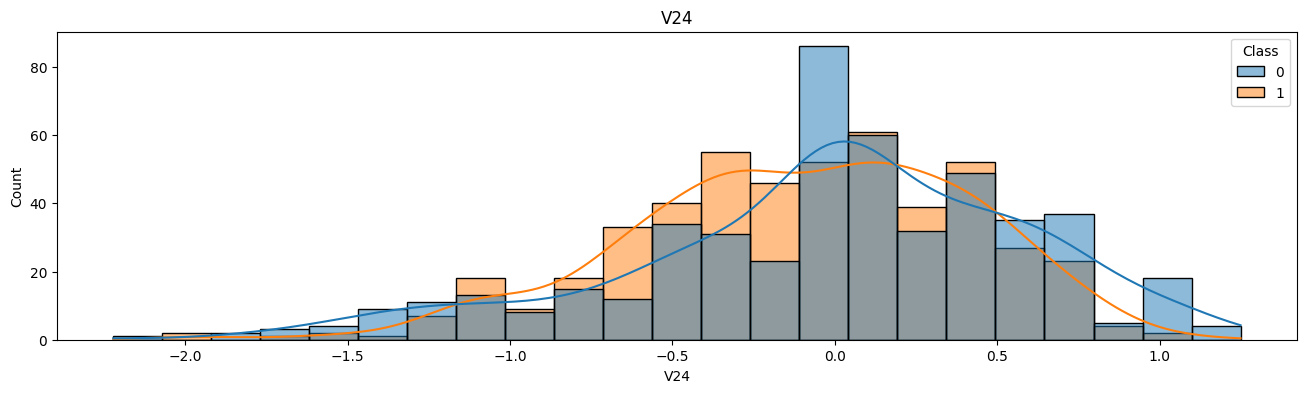

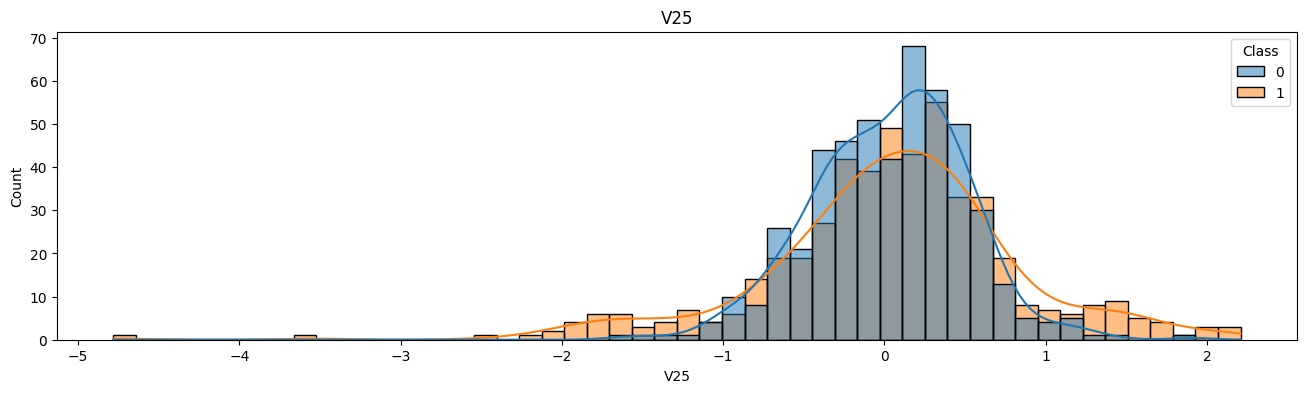

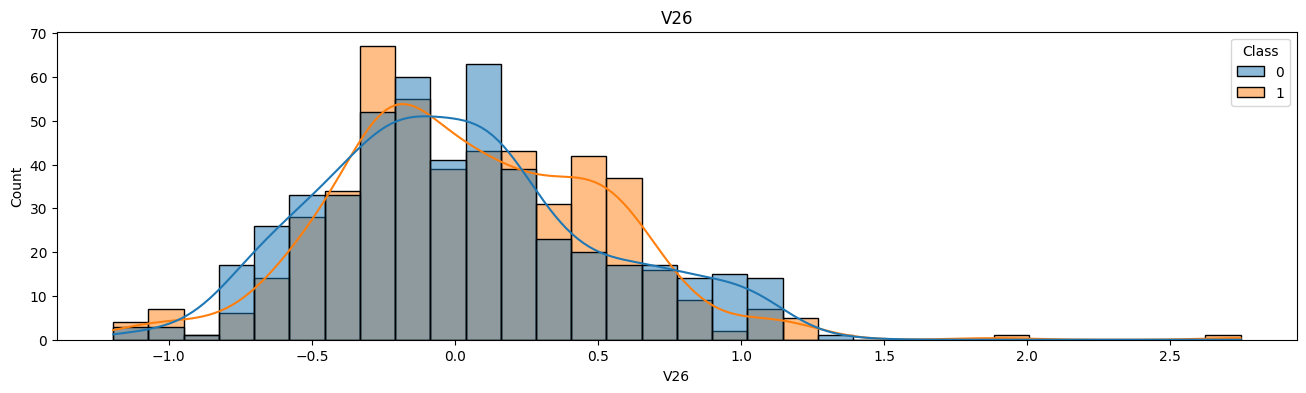

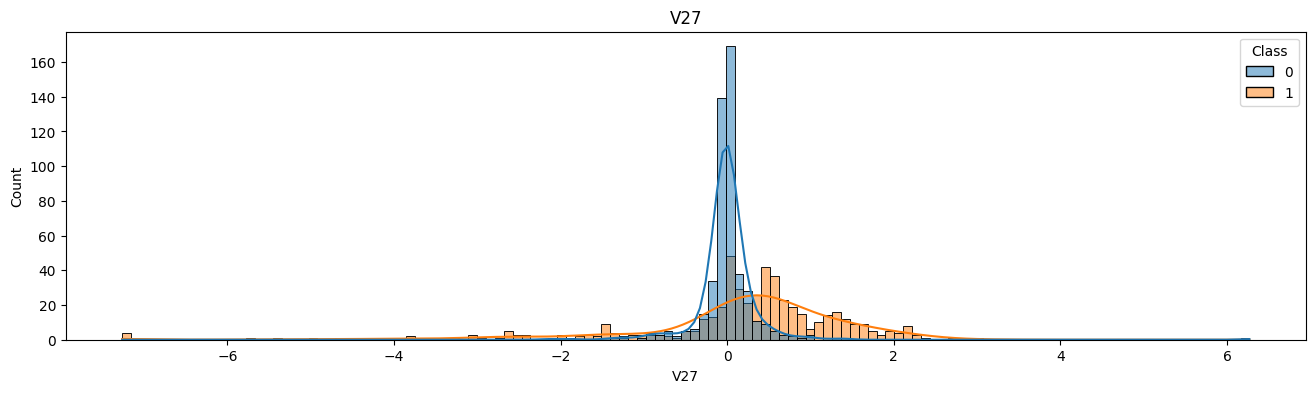

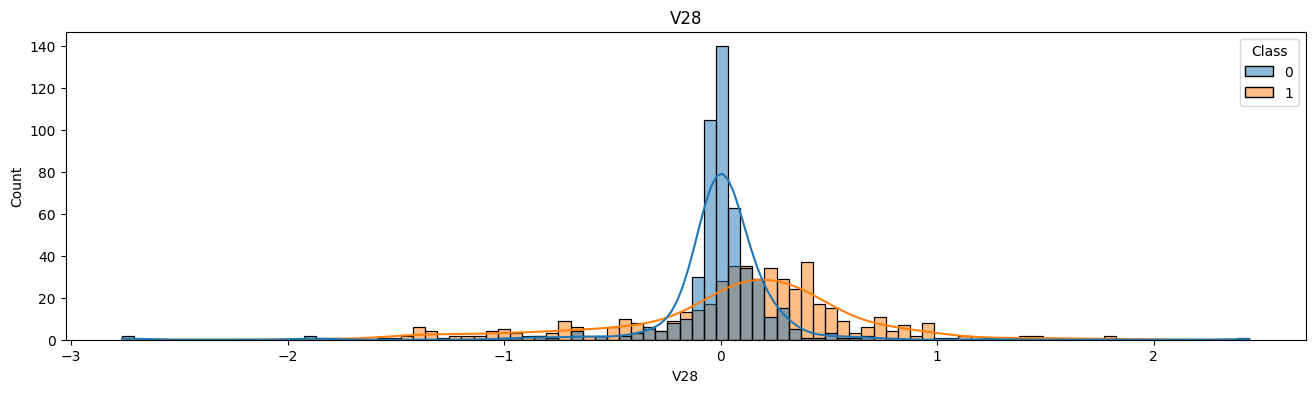

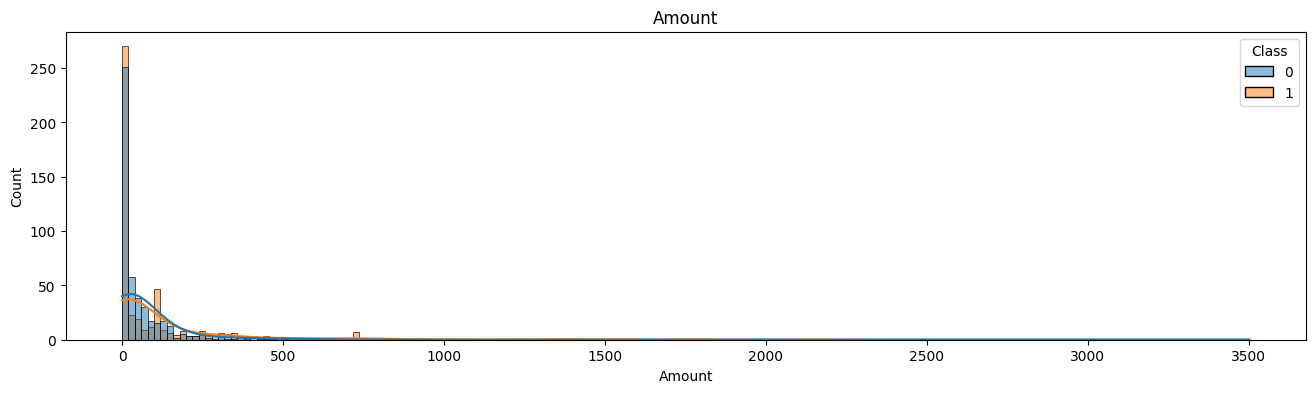

In [19]:
# Create histogram plots for each feature separate by class
for column in credit_card:
    # Exclude the 'Class' column to avoid plotting histograms for the target variable
    if column != 'Class':
        plt.figure(figsize=(16, 4))

        # Plot a histogram for the current feature (column) using seaborn
        sns.histplot(data=new_credit_card, x=column, kde=True, hue="Class").set_title(column)

        # Set the title of the plot based on the current feature (column)
        plt.title(f'Histogram for {column} (by Class)')


We have multiple variables that exhibit distinct contrast and differences when plotted on a histogram against the label.

Feature:
V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V14, V16, V17, V18, V19, V21, V27, V28

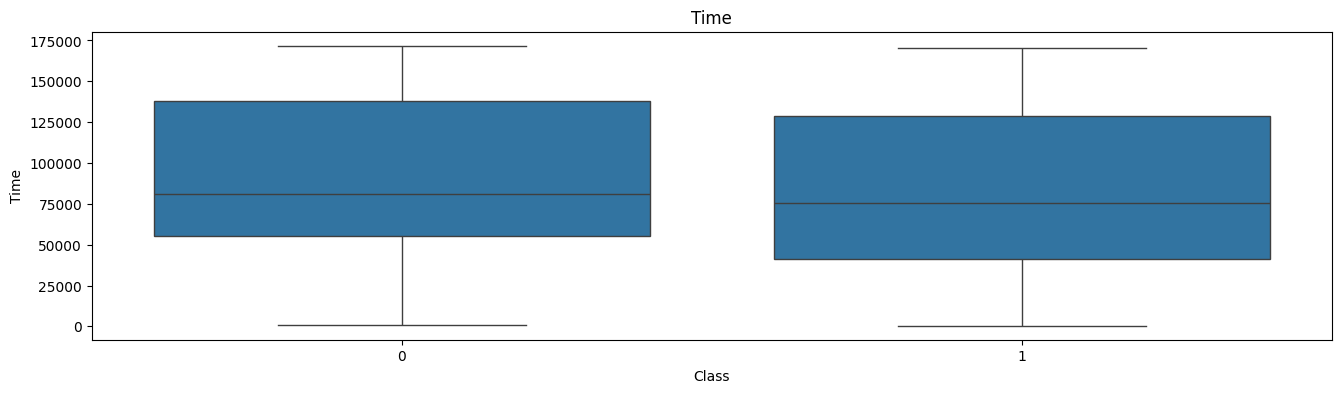

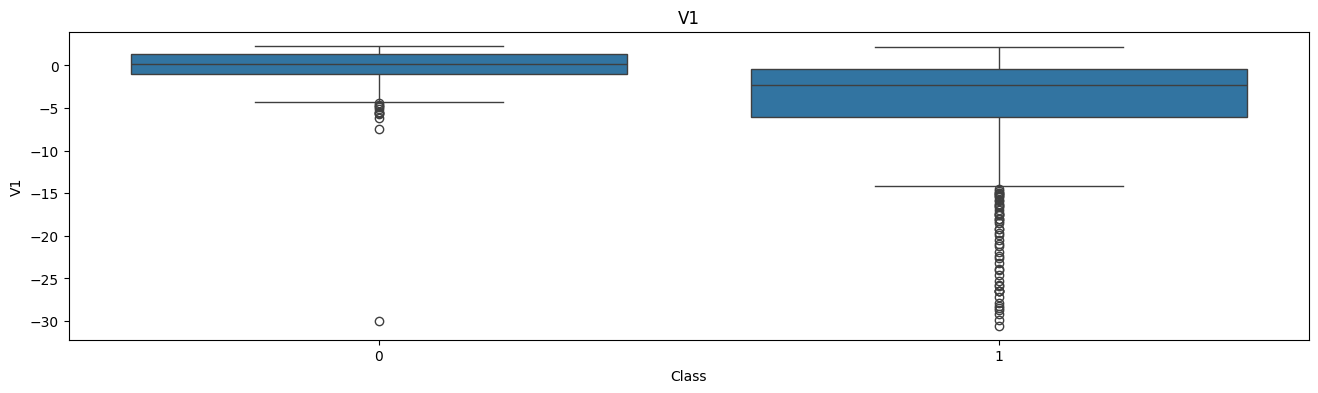

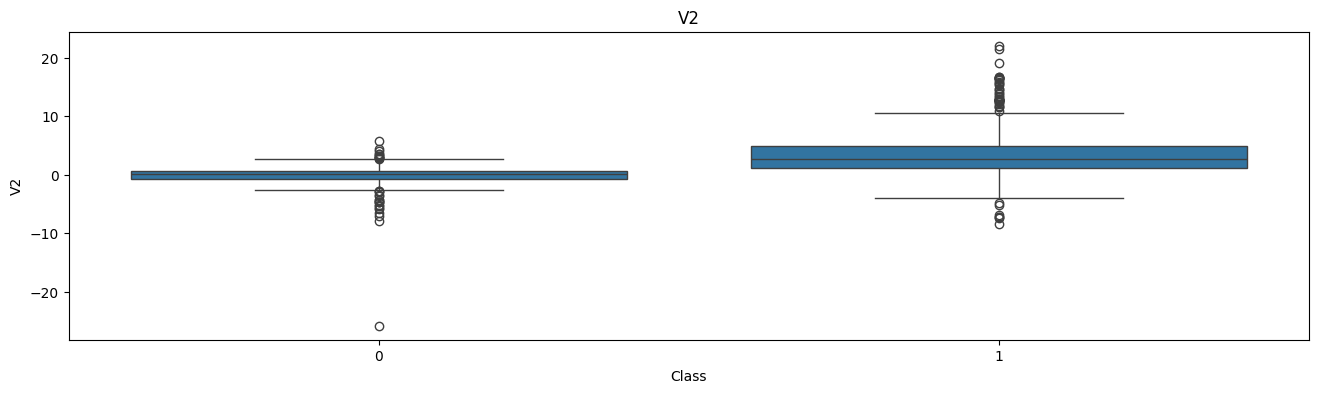

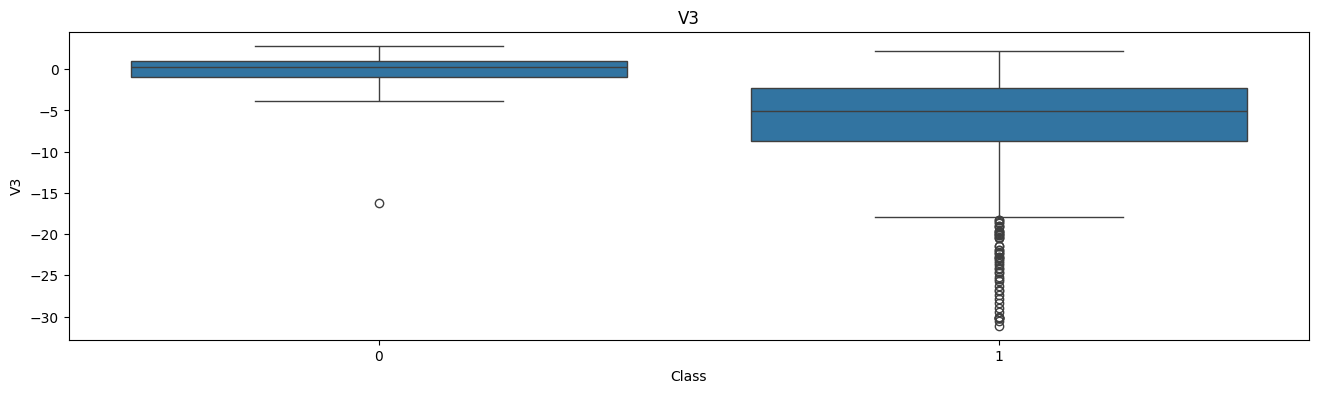

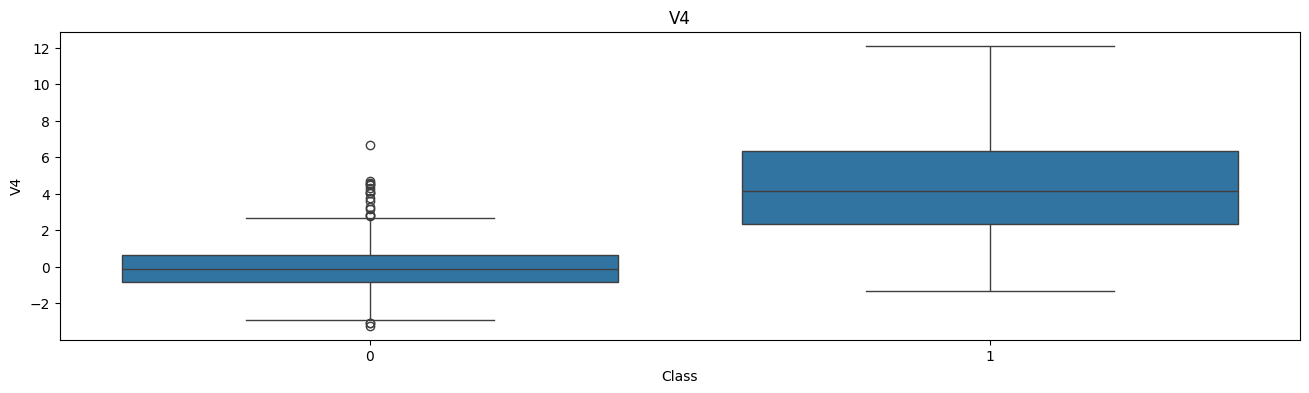

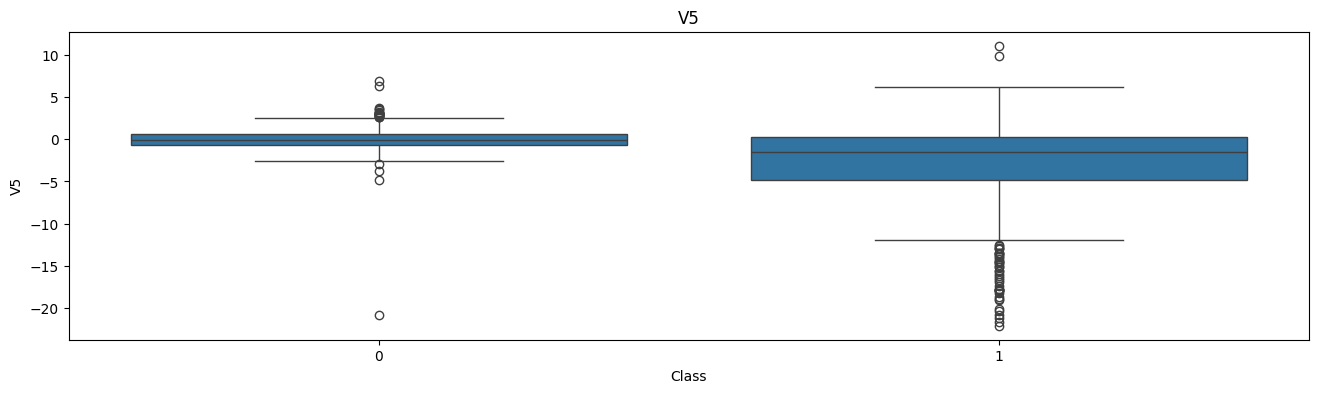

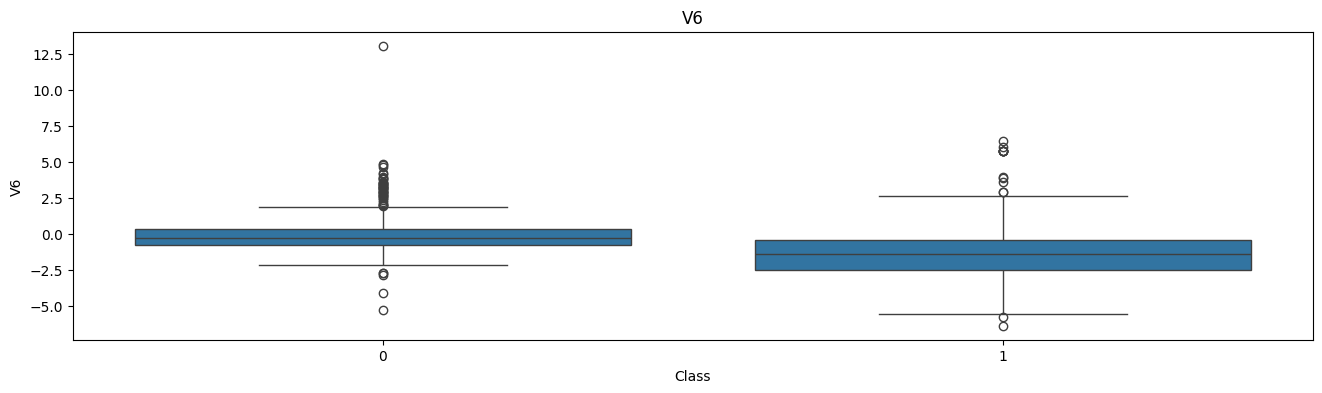

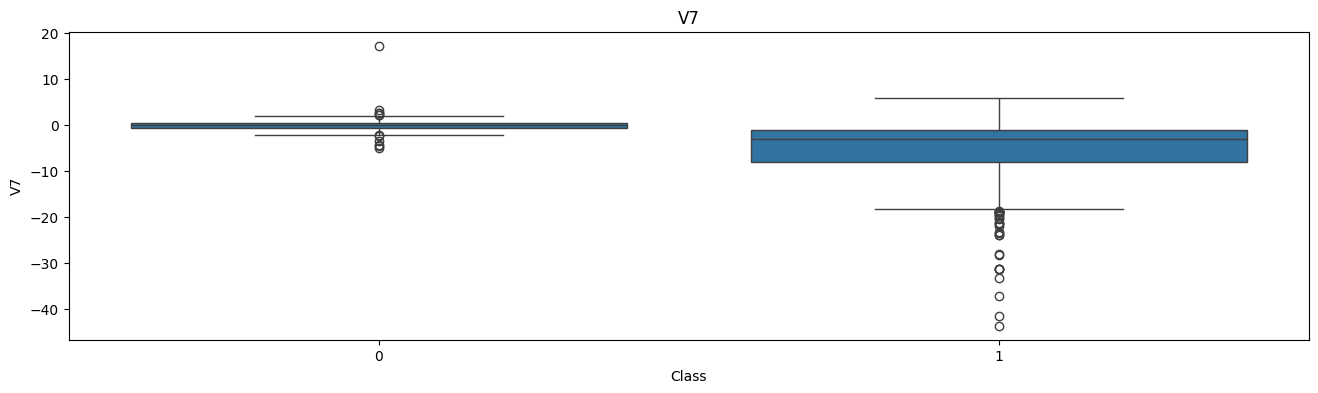

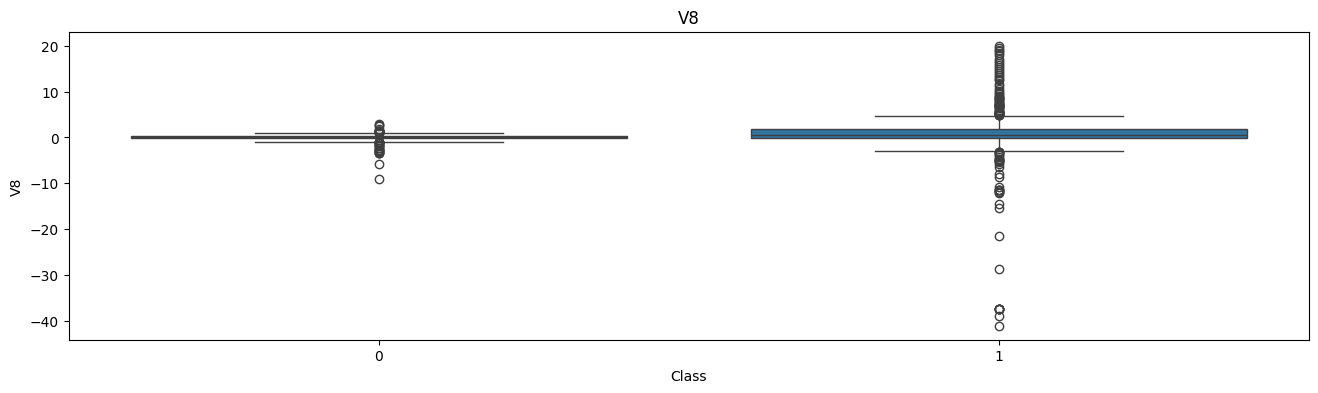

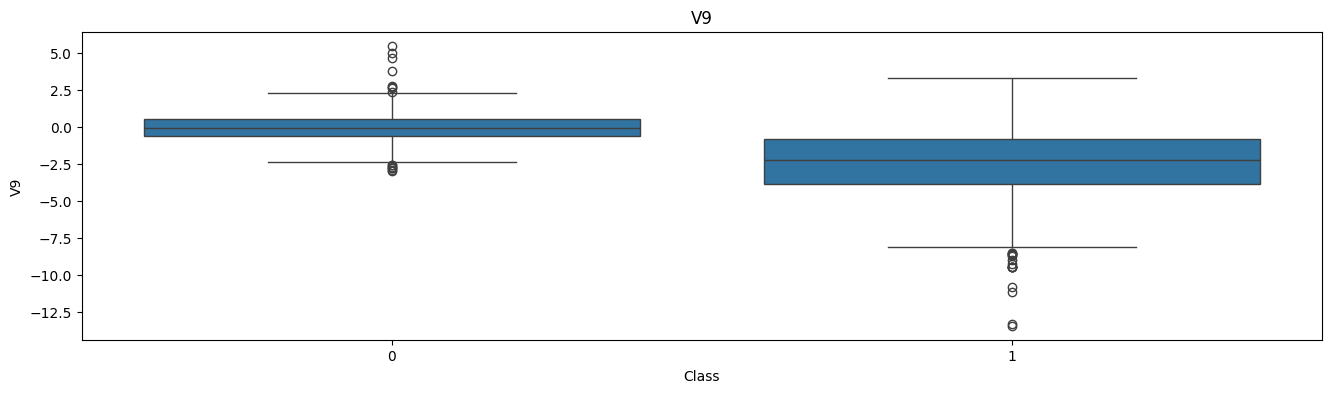

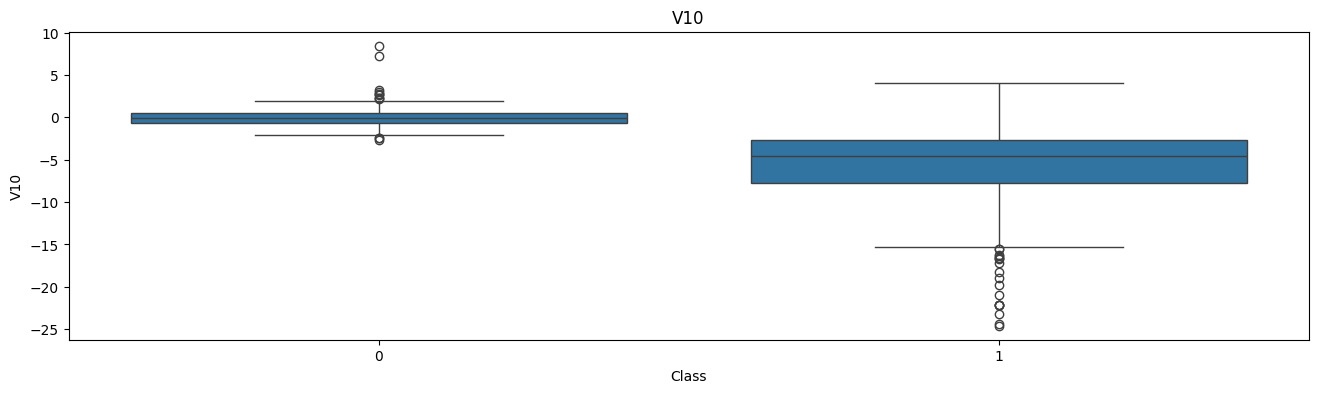

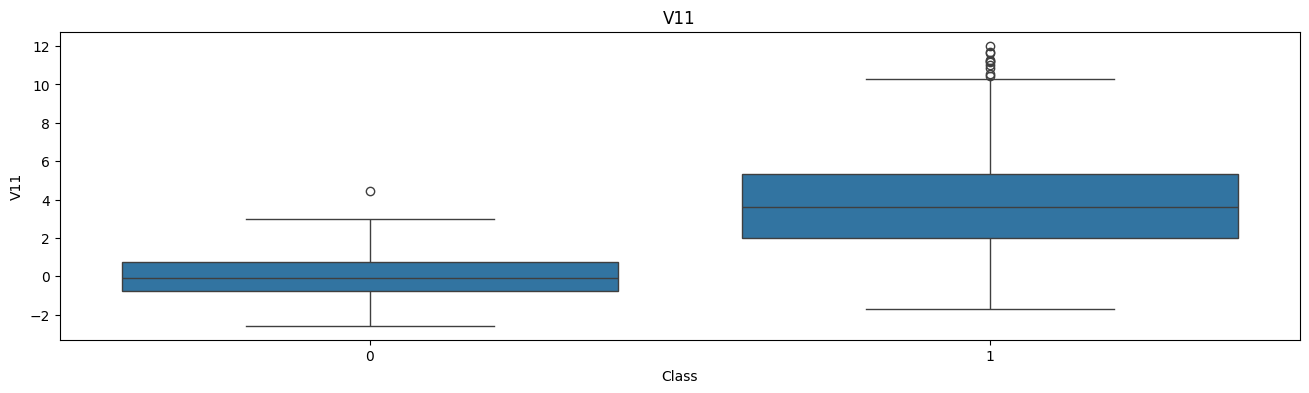

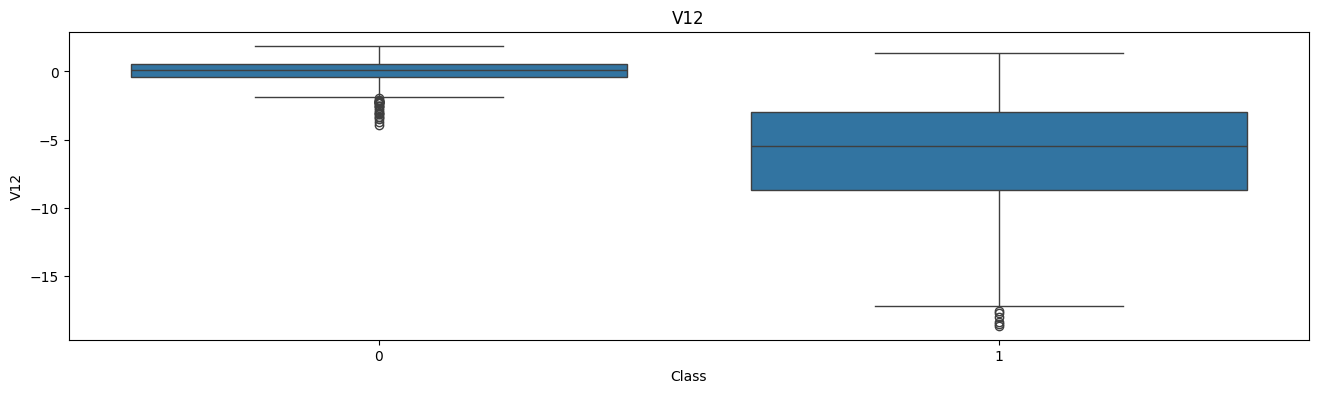

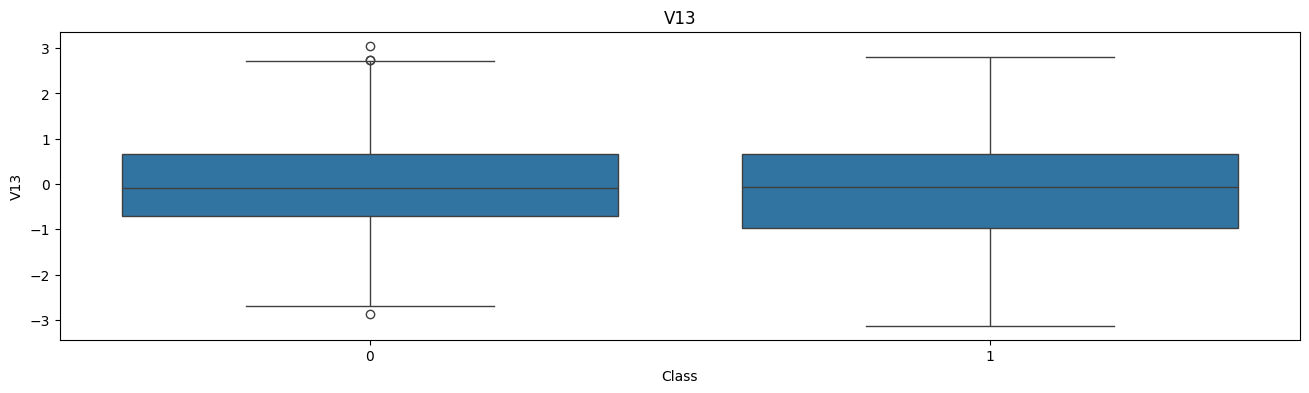

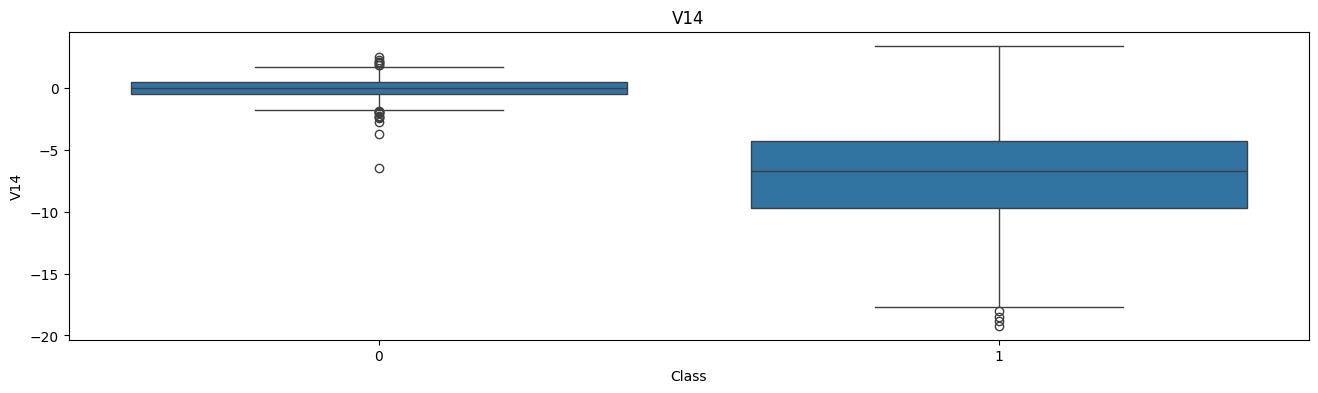

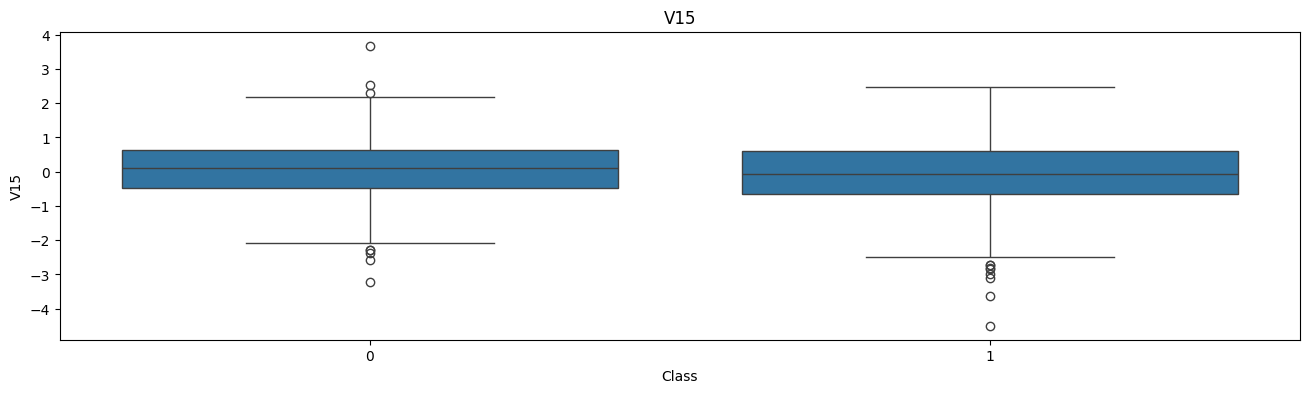

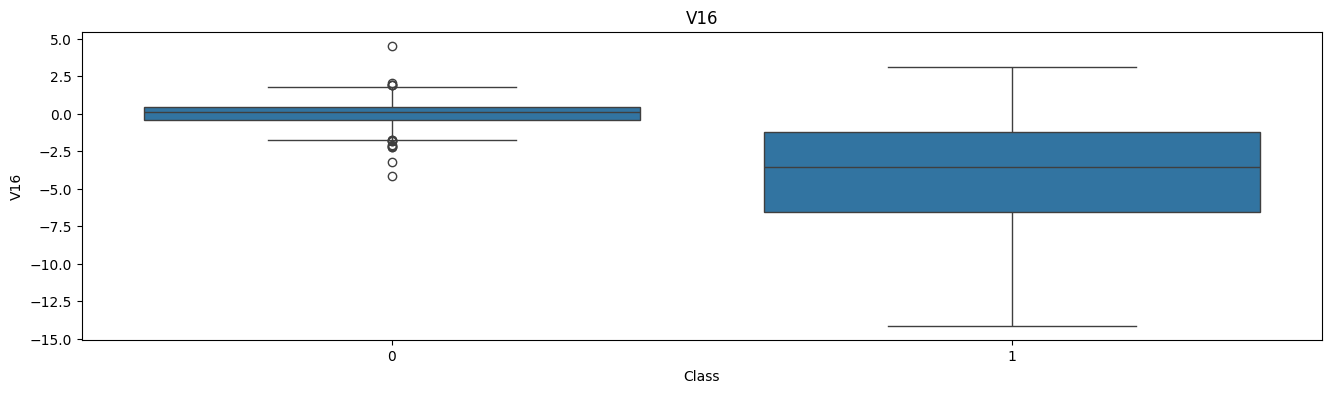

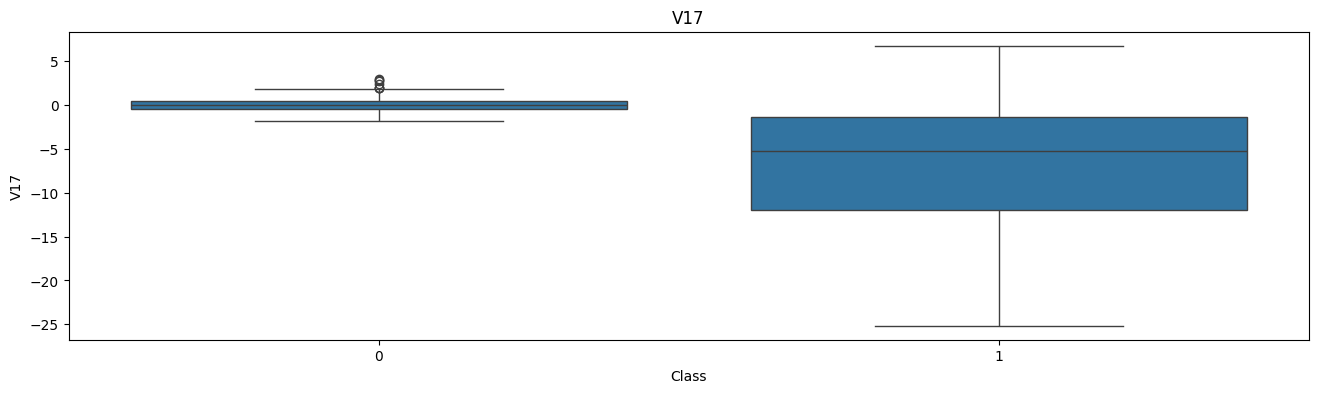

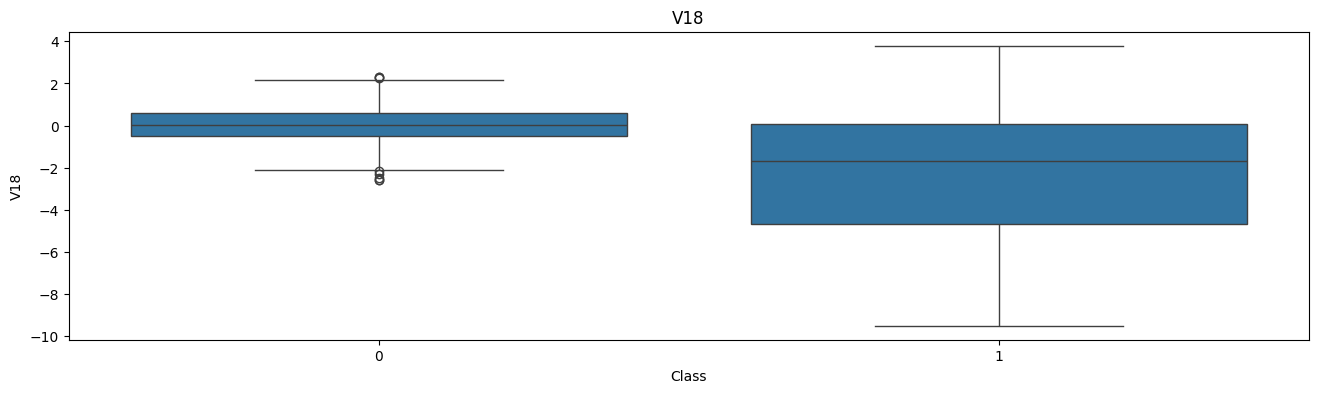

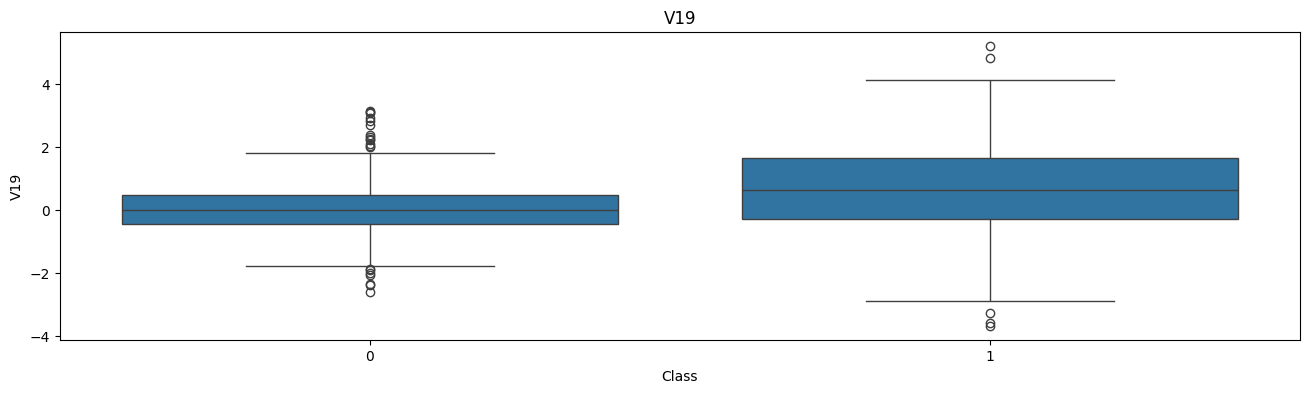

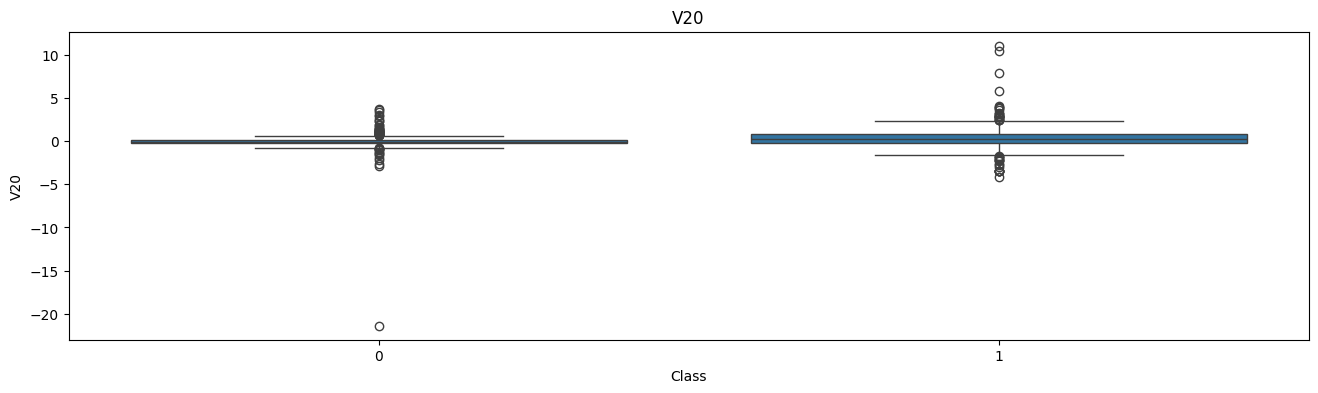

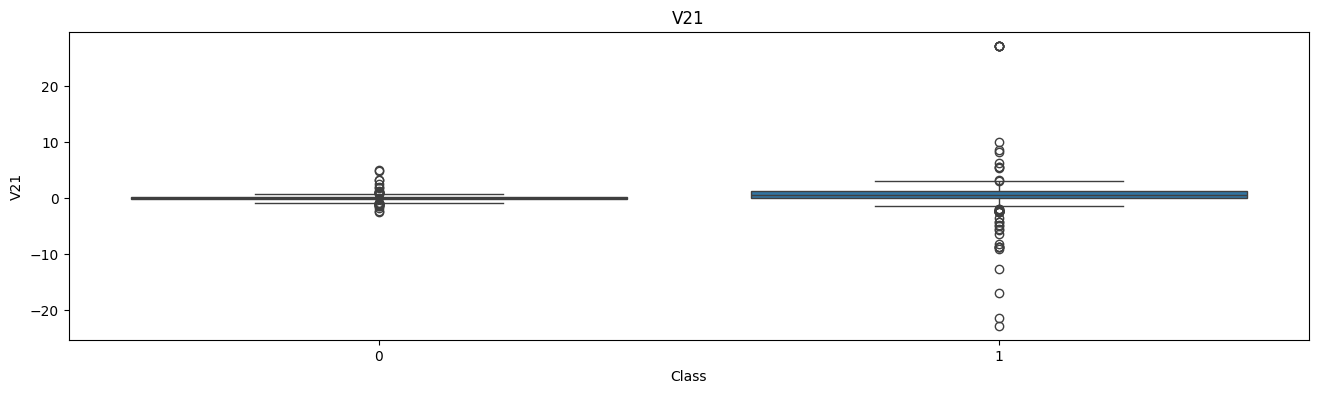

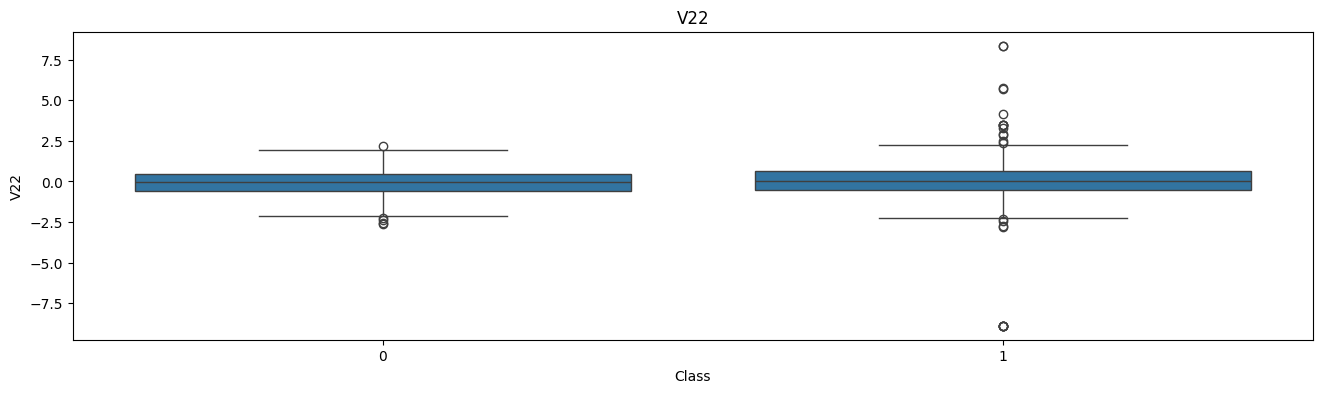

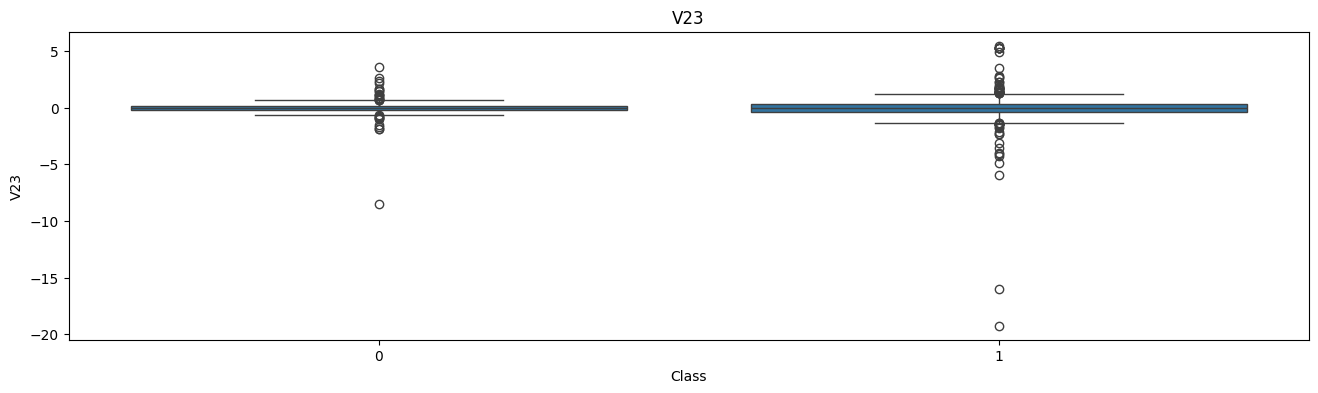

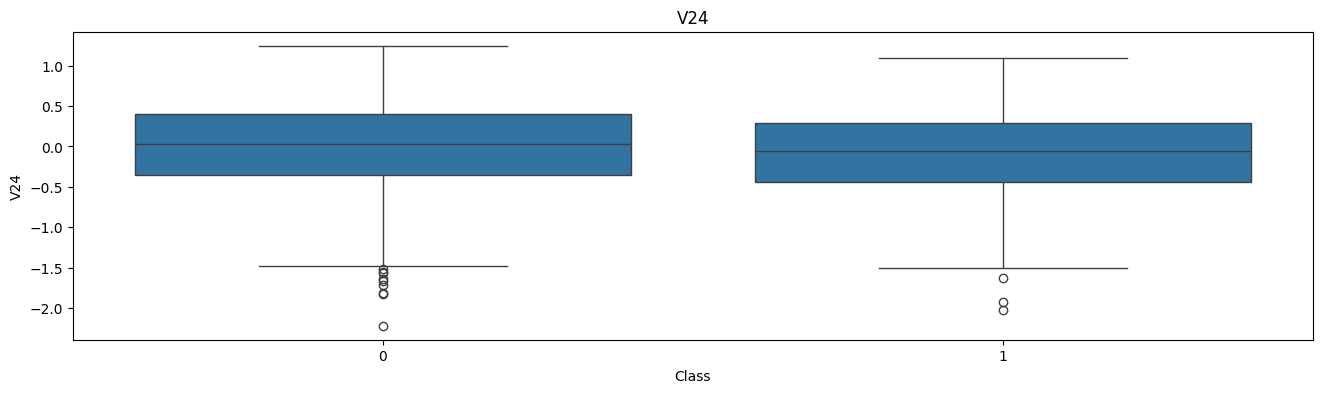

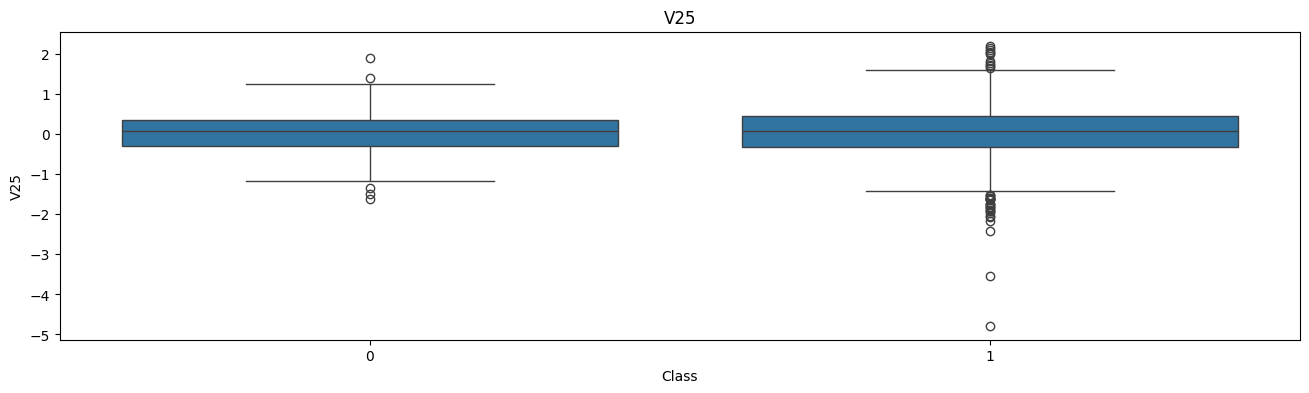

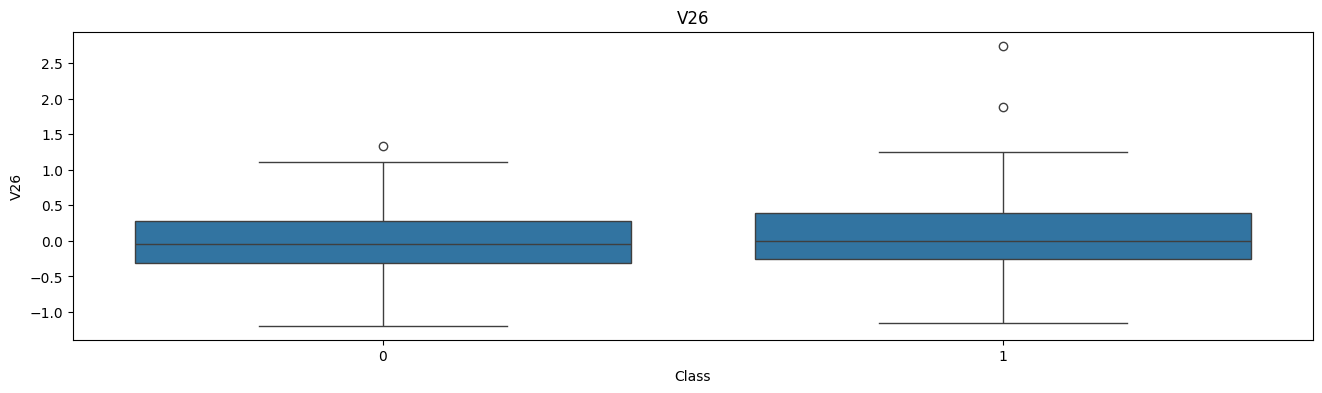

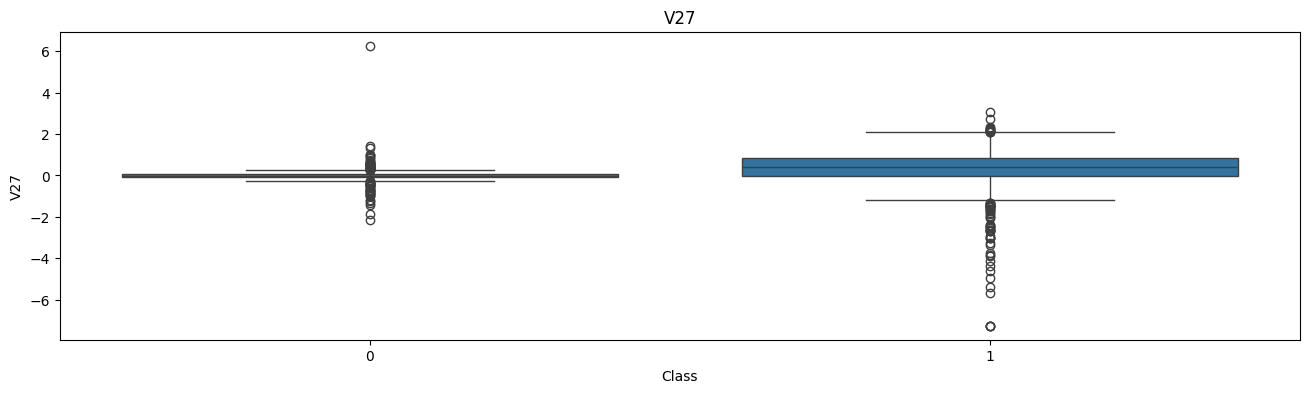

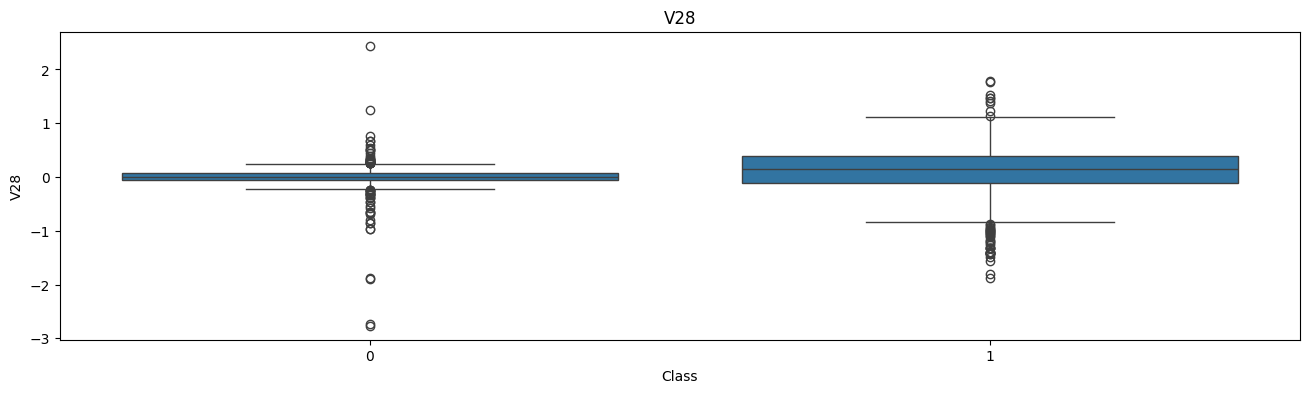

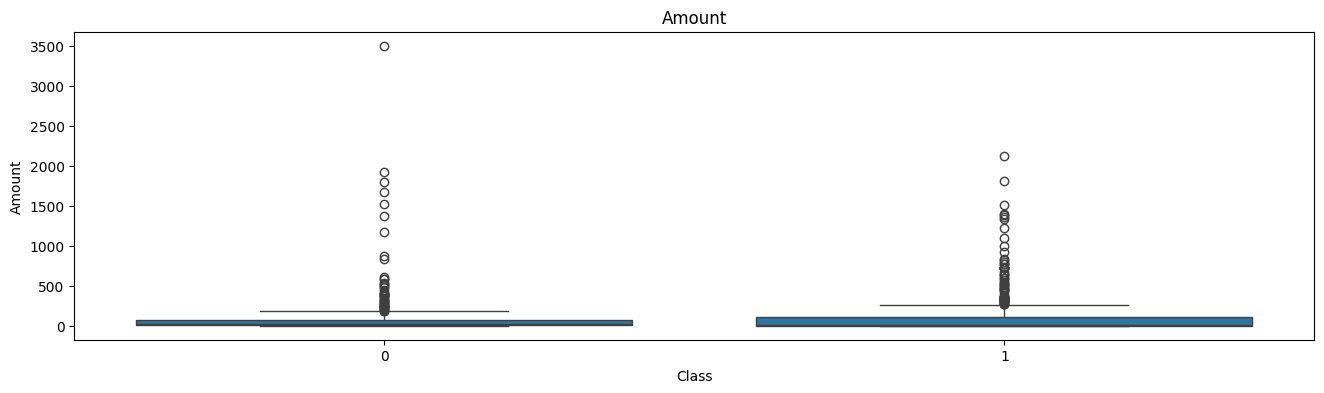

In [20]:
# Create box plots for each feature grouped by class
for column in credit_card:
    # Exclude the 'Class' column to avoid plotting box plots for the target variable
    if column != 'Class':
        plt.figure(figsize=(16, 4))

        # Plot a box plot for the current feature (column) grouped by 'Class' using seaborn
        sns.boxplot(data=new_credit_card, x='Class', y=column).set_title(f'Box Plot for {column}')

        # Set the title of the plot based on the current feature (column)
        plt.title(f'Box Plot for {column} (grouped by Class)')

        plt.show()

We have multiple variables that exhibit distinct contrast and differences when plotted on a histogram against the label.

Feature:
V1, V2, V3, V4, V5, V6, V7, V9, V10, V11, V12, V14, V16, V17, V19, V23, V27, V28

In [21]:
# col_to_keep = ['V3', 'V4', 'V7', 'V9', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'Class']
col_to_keep = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V19', 'V21', 'V27', 'V28', 'Class']

After viewing the boxplot, correlation matrix, and histogram plots of the features and the label, we will select the following features:

V1, V2, V3, V4, V5, V6, V7, V9, V10, V11, V12, V14, V16, V17, V19, V21, V27, V28

Filter out the desired columns

In [22]:
# Filter the desired columns from the main dataframe
filtered_credit_card = new_credit_card[col_to_keep]
print(filtered_credit_card)

             V1        V2         V3        V4         V5        V6  \
0    -16.526507  8.584972 -18.649853  9.505594 -13.793819 -2.832404   
565   -2.250535  2.365755  -2.955491  0.089791  -2.830745 -0.844462   
3025  -4.861747 -2.722660  -4.656248  2.502005  -2.008346  0.615422   
3228  -0.082983 -3.935919  -2.616709  0.163310  -1.400952 -0.809419   
4178  -1.360293 -0.458069  -0.700404  2.737229  -1.005106  2.891399   
...         ...       ...        ...       ...        ...       ...   
488   -1.808185  1.328808  -0.991449 -2.473986   2.185095  3.496806   
489   -0.557854  0.739269   2.014946 -0.309628  -0.166336 -0.366970   
490   -3.268917 -5.633745   0.799213 -1.086393   2.193818 -2.887715   
491   -0.229239 -2.586164  -1.256403  0.670196  -0.736295 -0.256117   
492   -2.625787  1.497192  -0.534041 -2.751021   0.328318 -0.526790   

             V7        V9        V10       V11        V12       V14       V16  \
0    -16.701694 -8.507059 -14.110184  5.299236 -10.834006 -9.37385

## Part 3: Modeling

Preparing the feature and label dataset for our machine learning model

In [23]:

# Seperate the features in to X and label in to Y
X = filtered_credit_card.drop(['Class'], axis = 1).reset_index(drop=True)
Y = filtered_credit_card['Class'].reset_index(drop=True)
print(X.shape, Y.shape)
print(X)

(984, 18) (984,)
            V1        V2         V3        V4         V5        V6         V7  \
0   -16.526507  8.584972 -18.649853  9.505594 -13.793819 -2.832404 -16.701694   
1    -2.250535  2.365755  -2.955491  0.089791  -2.830745 -0.844462  -0.174062   
2    -4.861747 -2.722660  -4.656248  2.502005  -2.008346  0.615422  -3.485680   
3    -0.082983 -3.935919  -2.616709  0.163310  -1.400952 -0.809419   1.501580   
4    -1.360293 -0.458069  -0.700404  2.737229  -1.005106  2.891399   5.802537   
..         ...       ...        ...       ...        ...       ...        ...   
979  -1.808185  1.328808  -0.991449 -2.473986   2.185095  3.496806  -1.030373   
980  -0.557854  0.739269   2.014946 -0.309628  -0.166336 -0.366970   0.350319   
981  -3.268917 -5.633745   0.799213 -1.086393   2.193818 -2.887715  -2.200518   
982  -0.229239 -2.586164  -1.256403  0.670196  -0.736295 -0.256117   1.275791   
983  -2.625787  1.497192  -0.534041 -2.751021   0.328318 -0.526790   0.995394   

          

### Part 3.1: Model Optimizations

We will employ GridSearchCV to optimize the hyperparameters for the random forest, naive bayes, and convolution DL model

#### Part 3.1.a: Random Forest Optimizing

In [24]:
# Employ train test split to seperate the data for random forest optimizing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Apply standard scalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Parameters we would like to test
params = {'criterion': ['gini', 'entropy'],
     'max_depth': [2*n for n in range(1,5)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]
     }

# Creates the random forest classifer and apply gridsearchcv to fin the optimal params
RanF = RandomForestClassifier()
RanF_cv = GridSearchCV(RanF, params, cv = 10)
RanF_cv.fit(X_train_scaled, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [26]:
# Print the optimal paramaters
print("Best params",RanF_cv.best_params_)
print("Accuracy :",RanF_cv.best_score_)
optiparams_RanF = RanF_cv.best_params_

Best params {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy : 0.9457482124616956


Optimal Parameters for Random Forest

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [27]:
# Evaluate the random forest model with the optimal hyperparamters
RanF = RandomForestClassifier(criterion = optiparams_RanF['criterion'], max_depth = optiparams_RanF['max_depth'], max_features = optiparams_RanF['max_features'], min_samples_leaf = optiparams_RanF['min_samples_leaf'], min_samples_split = optiparams_RanF['min_samples_split'])
RanF.fit(X_train_scaled, Y_train)

# Find the accuracy of the test data
accRanF = RanF.score(X_test_scaled, Y_test)
print(accRanF)

0.9292929292929293


#### Part 3.1.b: Naive Bayes Optimizing
No hyperparameters to optimize


#### Part 3.1.c: Conv Optimizing


We will employ scikeras to create a kerasclassifier and optimize the parameter using GridSearchCV

In [29]:

# Function that creates a model with the different params
def create_model(optimizer, activation_1, activation_2, neurons_1, neurons_2, pooling):

    model = Sequential()
    model.add(Conv1D(neurons_1, 3, activation=activation_1, input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pooling))
    model.add(Flatten())
    model.add(Dense(neurons_2, activation=activation_2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Parameters we want to test out
params = {
    'model__optimizer': ['adam'],
    'model__activation_1': ['relu', 'sigmoid'],
    'model__activation_2': ['relu', 'sigmoid'],
    'model__pooling': [2, 3, 4],
    'model__neurons_1': [32, 64, 128],
    'model__neurons_2': [32, 64, 128]  # Adjust neuron range if needed
}

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a classifier using the create_model function.
keras_clf = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Use Gridsearchcv to find the optimal params for the model
grid = GridSearchCV(keras_clf, params, cv=3)

# Fit the data
grid_result = grid.fit(X_train_scaled, Y_train)



In [43]:
# Print the optimal paramaters
print("Best Score:", grid_result.best_score_)
print("Best Parameters:", grid_result.best_params_)
optiparams_conv = grid_result.best_params_

Best Score: 0.943502824858757
Best Parameters: {'model__activation_1': 'relu', 'model__activation_2': 'sigmoid', 'model__neurons_1': 128, 'model__neurons_2': 32, 'model__optimizer': 'adam', 'model__pooling': 3}


Optimal parameters for the Conv1D model:
{'model__activation_1': 'relu',
'model__activation_2': 'sigmoid',
'model__neurons_1': 128,
'model__neurons_2': 32,
'model__optimizer': 'adam',
'model__pooling': 3}

In [31]:
# Evauluating the Conv1D model with the optimal parameters from gridsearchCV
model = Sequential()
model.add(Conv1D(optiparams_conv['model__neurons_1'], 3, activation=optiparams_conv['model__activation_1'], input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=optiparams_conv['model__pooling']))
model.add(Flatten())
model.add(Dense(optiparams_conv['model__neurons_2'], activation=optiparams_conv['model__activation_2']))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=optiparams_conv['model__optimizer'], metrics=['accuracy'])

# Fit and find the acc of the model on the test set
model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=0)
predictions = model.predict(X_test_scaled)
acc = accuracy_score(Y_test, predictions.round())
print(acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
0.9292929292929293


### Part 3.2: Model Evaluation

In [32]:
def get_performance_measures(CM):
    # Rerformance measures are formulated based on the values contrived from the confusion matrix
    TP = CM[1][1]
    TN = CM[0][0]
    FP = CM[0][1]
    FN = CM[1][0]

    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    FPR = FP / (TN + FP)
    FNR = FN / (TP + FN)

    recall = TP / (TP + FN)
    percision = TP / (TP + FP)
    f1 = 2 * TP / (2 * TP + FP + FN)
    acc = (TP + TN) / (TP + FP + FN + TN)
    err = (FP + FN) / (TP + FP + FN + TN)

    BACC = (TPR + TNR) / 2
    TSS = TPR - FPR
    HSS = 2 * (TP * TN - FP * FN) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN))

    brier_score = ((TP + TN) / (TP + FP + TN + FN)) ** 2

    # Aggregate and return the performance measures
    performance_measures = [TP, TN, FP, FN, TPR, TNR, FPR, TNR, recall, percision, acc, err, BACC, HSS, brier_score]
    return performance_measures

10-fold cross validation to average out the performance metrics of each classification model

In [33]:
# Apply the K-fold ato get a better estimation of the model performance and reduce overfitting
k = 10
accuracy_scores_RanF = []
accuracy_scores_NB = []
accuracy_scores_Conv = []
kf = KFold(n_splits=k, shuffle=True, random_state=42)

measure_names = ['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR', 'recall', 'percision', 'acc', 'err', 'BACC', 'HSS', 'brier_score']

iter = 0
# Iterate through each fold
for train_index, test_index in kf.split(X):

    iter += 1
    # Create the train and test datasets for model evaluation
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    Y_train, Y_test = Y.loc[train_index], Y.loc[test_index]

    # Standard scalar the dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ---------------------------------------------------------------------------------------------------
    # RandF - Model
    # ---------------------------------------------------------------------------------------------------

    # Use the optimal params from earlier
    RanF = RandomForestClassifier(criterion = optiparams_RanF['criterion'], max_depth = optiparams_RanF['max_depth'], max_features = optiparams_RanF['max_features'], min_samples_leaf = optiparams_RanF['min_samples_leaf'], min_samples_split = optiparams_RanF['min_samples_split'], random_state=42)
    RanF.fit(X_train_scaled, Y_train)
    ypred_RanF = RanF.predict(X_test_scaled)

    # Create confusion matrix with the results of the test data
    CM = confusion_matrix(Y_test, ypred_RanF)

    # Find the performance measures
    res_RanF = get_performance_measures(CM)

    # Add the performance measures into a list
    accuracy_scores_RanF.append(res_RanF)

    # ---------------------------------------------------------------------------------------------------
    # Naive Bayes
    # ---------------------------------------------------------------------------------------------------
    NB = GaussianNB()
    NB.fit(X_train_scaled, Y_train)
    ypred_NB = NB.predict(X_test_scaled)

    # Create confusion matrix with the results of the test data
    CM = confusion_matrix(Y_test, ypred_NB)

    # Find the performance measures
    res_NB = get_performance_measures(CM)

    # Add the performance measures into a list
    accuracy_scores_NB.append(res_NB)

    # ---------------------------------------------------------------------------------------------------
    # Conv1D
    # ---------------------------------------------------------------------------------------------------

    # Build the Conv1D model using the optimal params from the optimizating step
    model = Sequential()
    model.add(Conv1D(optiparams_conv['model__neurons_1'], 3, activation=optiparams_conv['model__activation_1'], input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=optiparams_conv['model__pooling']))
    model.add(Flatten())
    model.add(Dense(optiparams_conv['model__neurons_2'], activation=optiparams_conv['model__activation_2']))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=optiparams_conv['model__optimizer'], metrics=['accuracy'])

    # Fit the model with the training data
    model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=0)

    # Predict the test data
    predictions = model.predict(X_test_scaled)
    y_pred_CONV = np.round(predictions).flatten().astype(int)

    # Create confusion matrix with the results of the test data
    CM = confusion_matrix(Y_test, y_pred_CONV)

    # Find the performance measures
    res_Conv = get_performance_measures(CM)

    # Add the performance measures into a list
    accuracy_scores_Conv.append(res_Conv)

    # ---------------------------------------------------------------------------------------------------
    # Aggregating the model performance metric and put them into a dataframe
    # ---------------------------------------------------------------------------------------------------

    # Iteration performance metrics
    print("Iteration:", iter)
    iter_accuracy_scores_RanF = pd.DataFrame(res_RanF).T
    iter_accuracy_scores_NB = pd.DataFrame(res_NB).T
    iter_accuracy_scores_Conv = pd.DataFrame(res_Conv).T

    # Rename the dataframes
    iter_accuracy_scores_RanF.columns = measure_names
    iter_accuracy_scores_NB.columns = measure_names
    iter_accuracy_scores_Conv.columns = measure_names

    # Concat the performance measure from each iteration and model
    iter_performance_measure = pd.concat([iter_accuracy_scores_RanF, iter_accuracy_scores_NB, iter_accuracy_scores_Conv]).T

    # Rename the dataframe
    iter_performance_measure.columns = ['RandomForest', 'NaiveBayes', 'Conv1D']

    # Print the performance measures of each model for this iteration
    print(iter_performance_measure.round(2))




# Convert complied performance metrics from each iteration into a data frame and rename them
accuracy_scores_RanF_df = pd.DataFrame(accuracy_scores_RanF)
accuracy_scores_RanF_df.columns = measure_names

accuracy_scores_NB_df = pd.DataFrame(accuracy_scores_NB)
accuracy_scores_NB_df.columns = measure_names

accuracy_scores_Conv_df = pd.DataFrame(accuracy_scores_Conv)
accuracy_scores_Conv_df.columns = measure_names


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Iteration: 1
             RandomForest  NaiveBayes  Conv1D
TP                  45.00       42.00   45.00
TN                  48.00       48.00   48.00
FP                   0.00        0.00    0.00
FN                   6.00        9.00    6.00
TPR                  0.88        0.82    0.88
TNR                  1.00        1.00    1.00
FPR                  0.00        0.00    0.00
FNR                  1.00        1.00    1.00
recall               0.88        0.82    0.88
percision            1.00        1.00    1.00
acc                  0.94        0.91    0.94
err                  0.06        0.09    0.06
BACC                 0.94        0.91    0.94
HSS                  0.88        0.82    0.88
brier_score          0.88        0.83    0.88
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step
Iteration: 2
             RandomForest  NaiveBayes  Conv1D
TP                  43.00       40.00   42.00
TN                  50.00       51.00   49.00
FP                   1.0

## Part 4: Results

### Part 4.1: Tables

In [34]:
# Show the performance metrics for the random forest model
accuracy_scores_RanF_df.round(2)

,TP,TN,FP,FN,TPR,TNR,FPR,FNR,recall,percision,acc,err,BACC,HSS,brier_score
0,45,48,0,6,0.88,1.00,0.00,1.00,0.88,1.00,0.94,0.06,0.94,0.88,0.88
1,43,50,1,5,0.90,0.98,0.02,0.98,0.90,0.98,0.94,0.06,0.94,0.88,0.88
2,50,46,1,2,0.96,0.98,0.02,0.98,0.96,0.98,0.97,0.03,0.97,0.94,0.94
3,47,46,1,5,0.90,0.98,0.02,0.98,0.90,0.98,0.94,0.06,0.94,0.88,0.88
4,46,46,1,5,0.90,0.98,0.02,0.98,0.90,0.98,0.94,0.06,0.94,0.88,0.88
5,51,43,0,4,0.93,1.00,0.00,1.00,0.93,1.00,0.96,0.04,0.96,0.92,0.92
6,37,52,2,7,0.84,0.96,0.04,0.96,0.84,0.95,0.91,0.09,0.90,0.81,0.82
7,38,57,1,2,0.95,0.98,0.02,0.98,0.95,0.97,0.97,0.03,0.97,0.94,0.94
8,38,53,2,5,0.88,0.96,0.04,0.96,0.88,0.95,0.93,0.07,0.92,0.85,0.86
9,52,42,0,4,0.93,1.00,0.00,1.00,0.93,1.00,0.96,0.04,0.96,0.92,0.92


In [35]:
# Show the performance metrics for the naive bayes model
accuracy_scores_NB_df.round(2)

,TP,TN,FP,FN,TPR,TNR,FPR,FNR,recall,percision,acc,err,BACC,HSS,brier_score
0,42,48,0,9,0.82,1.00,0.00,1.00,0.82,1.00,0.91,0.09,0.91,0.82,0.83
1,40,51,0,8,0.83,1.00,0.00,1.00,0.83,1.00,0.92,0.08,0.92,0.84,0.84
2,47,46,1,5,0.90,0.98,0.02,0.98,0.90,0.98,0.94,0.06,0.94,0.88,0.88
3,45,46,1,7,0.87,0.98,0.02,0.98,0.87,0.98,0.92,0.08,0.92,0.84,0.84
4,44,47,0,7,0.86,1.00,0.00,1.00,0.86,1.00,0.93,0.07,0.93,0.86,0.86
5,52,42,1,3,0.95,0.98,0.02,0.98,0.95,0.98,0.96,0.04,0.96,0.92,0.92
6,35,51,3,9,0.80,0.94,0.06,0.94,0.80,0.92,0.88,0.12,0.87,0.75,0.77
7,35,57,1,5,0.88,0.98,0.02,0.98,0.88,0.97,0.94,0.06,0.93,0.87,0.88
8,34,54,1,9,0.79,0.98,0.02,0.98,0.79,0.97,0.90,0.10,0.89,0.79,0.81
9,49,41,1,7,0.88,0.98,0.02,0.98,0.88,0.98,0.92,0.08,0.93,0.84,0.84


In [36]:
# Show the performance metrics for the Conv1D model
accuracy_scores_Conv_df.round(2)

,TP,TN,FP,FN,TPR,TNR,FPR,FNR,recall,percision,acc,err,BACC,HSS,brier_score
0,45,48,0,6,0.88,1.00,0.00,1.00,0.88,1.00,0.94,0.06,0.94,0.88,0.88
1,42,49,2,6,0.88,0.96,0.04,0.96,0.88,0.95,0.92,0.08,0.92,0.84,0.84
2,50,46,1,2,0.96,0.98,0.02,0.98,0.96,0.98,0.97,0.03,0.97,0.94,0.94
3,46,47,0,6,0.88,1.00,0.00,1.00,0.88,1.00,0.94,0.06,0.94,0.88,0.88
4,46,46,1,5,0.90,0.98,0.02,0.98,0.90,0.98,0.94,0.06,0.94,0.88,0.88
5,53,43,0,2,0.96,1.00,0.00,1.00,0.96,1.00,0.98,0.02,0.98,0.96,0.96
6,37,51,3,7,0.84,0.94,0.06,0.94,0.84,0.92,0.90,0.10,0.89,0.79,0.81
7,39,56,2,1,0.98,0.97,0.03,0.97,0.98,0.95,0.97,0.03,0.97,0.94,0.94
8,35,55,0,8,0.81,1.00,0.00,1.00,0.81,1.00,0.92,0.08,0.91,0.83,0.84
9,53,38,4,3,0.95,0.90,0.10,0.90,0.95,0.93,0.93,0.07,0.93,0.85,0.86


In [37]:
# Compute the average performance metrics from the iterations of each model and commbine them into 1 dataframe
performance_measure_avg = pd.concat([accuracy_scores_RanF_df.mean(), accuracy_scores_NB_df.mean(), accuracy_scores_Conv_df.mean()], axis=1)
performance_measure_avg.columns = ['RandomForest', 'NaiveBayes', 'Conv1D']


Performance measures of the three classification models

In [38]:
# Show the average performance metrics of the three models
performance_measure_avg.round(2)

,RandomForest,NaiveBayes,Conv1D
TP,44.70,42.30,44.60
TN,48.30,48.30,47.90
FP,0.90,0.90,1.30
FN,4.50,6.90,4.60
TPR,0.91,0.86,0.90
TNR,0.98,0.98,0.97
FPR,0.02,0.02,0.03
FNR,0.98,0.98,0.97
recall,0.91,0.86,0.90
percision,0.98,0.98,0.97


### Part 4.2: ROC

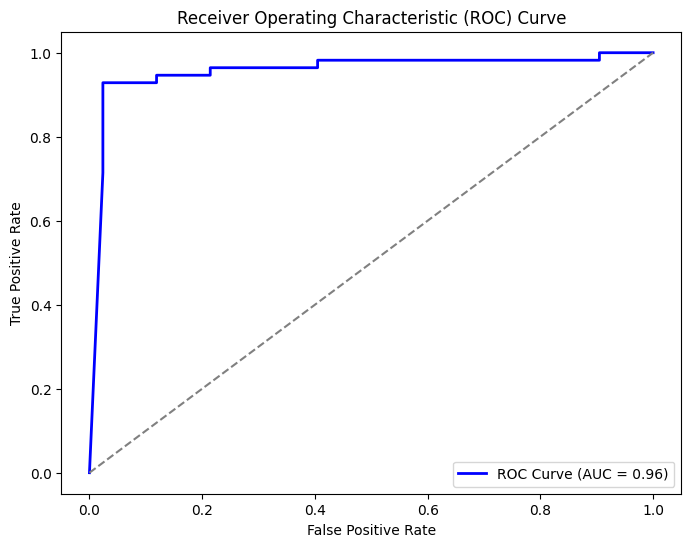

In [39]:
# Using the optimial hyperparameters, we create a random forest classifier
RanF = RandomForestClassifier(criterion = optiparams_RanF['criterion'], max_depth = optiparams_RanF['max_depth'], max_features = optiparams_RanF['max_features'], min_samples_leaf = optiparams_RanF['min_samples_leaf'], min_samples_split = optiparams_RanF['min_samples_split'], random_state=42)

RanF.fit(X_train_scaled, Y_train)

# Generate predicted probabilities on the test data
y_pred_proba = RanF.predict_proba(X_test)[:, 1]

# Compute ROC curve and calculate the AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = roc_auc_score(Y_test, y_pred_proba)

# Plot the ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


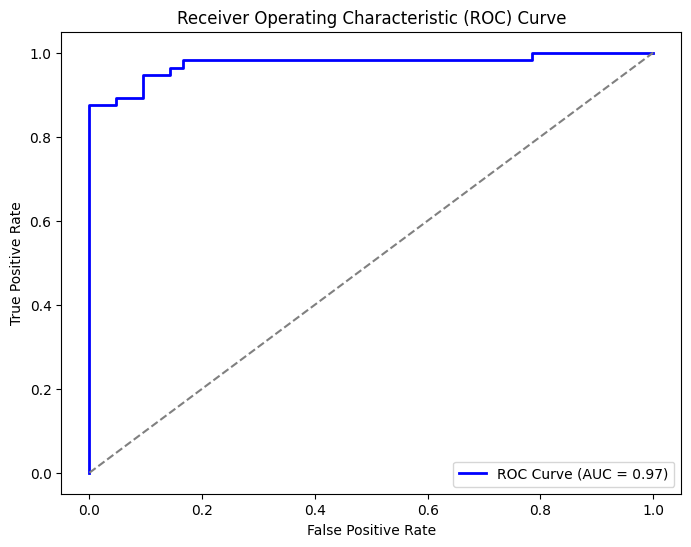

In [42]:
# we create a naive bayes model from earlier
NB = GaussianNB()
NB.fit(X_train_scaled, Y_train)

# Generate predicted probabilities on the test data
y_pred_proba = NB.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and calculate the AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = roc_auc_score(Y_test, y_pred_proba)

# Plot the ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


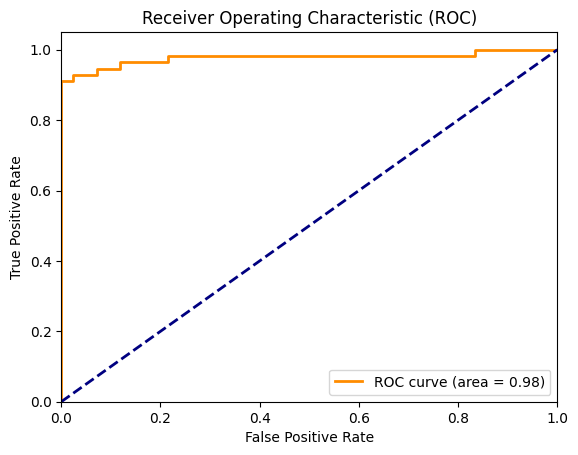

In [41]:
# Using the optimial parameters, we create the same conv1d model as earlier
model = Sequential()
model.add(Conv1D(optiparams_conv['model__neurons_1'], 3, activation=optiparams_conv['model__activation_1'], input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=optiparams_conv['model__pooling']))
model.add(Flatten())
model.add(Dense(optiparams_conv['model__neurons_2'], activation=optiparams_conv['model__activation_2']))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optiparams_conv['model__optimizer'], metrics=['accuracy'])

model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose = 0)
y_pred = model.predict(X_test_scaled)

# Compute ROC curve and calculate the AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


The receiver operating characteristic (ROC) curve suggest that the models are relatively strong, given the area under the curve is relatively close to 1. Among these classification models, the convolutional deep learning model exhibited a slightly higher AUC (0.98) compared to the other classification models (0.96 for Random Forest and 0.97 for Naive Bayes), although the difference was not significant enough to conclusively label it as the strongest model. This indicates that all the models perform well in distinguishing between the fradulent and non-fradulent transactions.

## Conclusion

In conclusion, the three classification models developed and optimized are strong models for identifying potentially fraudulent financial transactions. The random forest model slightly edged out the other models with an accruacy of 95% and had the least average number of false positives and negatives. The ensemble nature of the random forest, which leverages multiple decision trees to make predictions and then aggregates them, likely contributed to its robust performance. However, it is important to acknowledge that the other modesl were equally as strong since their performance metrics were comparable to the random forest. Further exploration and fine-tuning of these models could potentially enhance their predictive power and suitability for detecting fraudulent activities in financial transactions.